In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 100
pd.options.display.max_rows = 10
from datetime import datetime
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

from PIL import Image
from xlwt import Workbook

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# from ipynb.fs.full.feature_engineering import *

# Data Loading

In [68]:
#Import variables from 'feature_engineering' notebook
%store -r data
%store -r data_133

#Out of top 20 players, Wawrinka's name is different. Replace with consistent name
data_133["Player 1 name"].replace('Stanislas Wawrinka','Stan Wawrinka',inplace=True)
data_133["Player 1 name"].replace("Diego Sebastian Schwartzman","Diego Schwartzman",inplace=True)
# Diego Sebastian Schwartzman

return_data_133 = data_133[data_133["Shot_Type_"]=="return"]
return_data_133.drop(return_data_133.index[return_data_133["return_direction_outcome"].str.contains('unknown')],inplace=True)
# return_data_133["return_direction_outcome"].value_counts()
serve_data_133 = data_133[data_133["Shot_Type_"].isin(["1st serve","2nd serve"])]
rally_data_133 = data_133[data_133["Shot_Type_"].isin(["rally"])]

no stored variable or alias data


/var/folders/4_/d00l0kjx0d98bkwv29wwqzlm0000gn/T/ipykernel_5241/1475896661.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_data_133.drop(return_data_133.index[return_data_133["return_direction_outcome"].str.contains('unknown')],inplace=True)


Top 20 player's played at least ~40 games, which is a good sample size.

~400 shots per game

In [57]:
pd.options.display.max_rows=100
data_133.groupby('Year').count().transform(lambda x: x/x.sum())["Player 1 name"].sort_values(ascending=False)[:5].sum()
data_133.groupby('Year').count().transform(lambda x: x/x.sum())["Player 1 name"].sort_values(ascending=False)[:5]
#             temp_df = df[(df['shot_group']==sg) & (df['From_Court']== fc)]\
#             .groupby(['shot_group','From_Court','return_direction_outcome']).count()\
#             .transform(lambda x: x/x.sum())["Player 1 name"]

Year
2015    0.156047
2018    0.129340
2016    0.111329
2017    0.095845
2014    0.055717
Name: Player 1 name, dtype: float64

<AxesSubplot:ylabel='Frequency'>

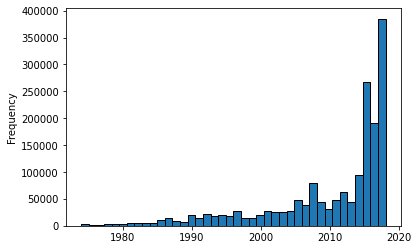

In [70]:
data_133['Year'].plot(kind='hist', edgecolor='black', bins=40)

Player 1 name
Roger Federer            343
Novak Djokovic           235
Rafael Nadal             213
Andy Murray              147
Alexander Zverev         110
Pete Sampras              71
Andre Agassi              65
Stefan Edberg             62
Kei Nishikori             54
Dominic Thiem             51
Lleyton Hewitt            51
David Ferrer              50
Stan Wawrinka             50
Juan Martin Del Potro     50
Tomas Berdych             47
Grigor Dimitrov           42
Boris Becker              41
Nick Kyrgios              40
Richard Gasquet           40
Jo Wilfried Tsonga        39
Milos Raonic              39
Marin Cilic               38
Ivan Lendl                38
Andy Roddick              34
David Goffin              34
John Isner                33
Gael Monfils              31
Kevin Anderson            31
Gilles Simon              30
Borna Coric               28
Name: Date, dtype: int64


Text(0.5, 1.0, '# of Matches per Player (Top 30)')

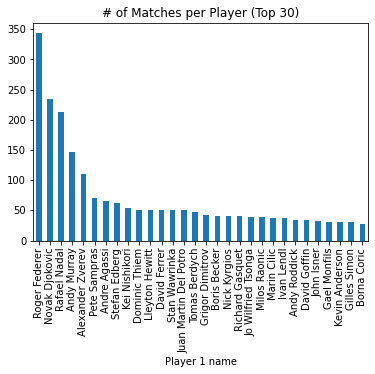

In [71]:
print(data_133.groupby('Player 1 name')['Date'].nunique().sort_values(ascending=False)[:30])
data_133.groupby('Player 1 name')['Date'].nunique().sort_values(ascending=False)[:30].plot(kind="bar")
plt.title("# of Matches per Player (Top 30)")

In [72]:
print(data.groupby('Player 1 name')['Date'].nunique().sort_values(ascending=False)[:])
# data.groupby('Player 1 name')['Date'].nunique().sort_values(ascending=False)[:].plot(kind="bar")

Player 1 name
Roger Federer        343
Simona Halep         271
Novak Djokovic       235
Rafael Nadal         213
Andy Murray          147
                    ... 
Jean Yves Aubone       1
Jay Clarke             1
Jay Berger             1
Jason Stoltenberg      1
Zi Yan                 1
Name: Date, Length: 885, dtype: int64


In [73]:
data["Date"]

0         2018-11-18
1         2018-11-18
2         2018-11-18
3         2018-11-18
4         2018-11-18
             ...    
3306473   1970-03-22
3306474   1970-03-22
3306475   1970-03-22
3306476   1970-03-22
3306477   1970-03-22
Name: Date, Length: 3306478, dtype: datetime64[ns]

In [74]:
data.groupby('Player 1 name')['Date'].nunique().sum()
343/8124
(343+235+213)/8124

0.09736582964057115

In [91]:
def top(n):
    top_n = list(data_133.groupby('Player 1 name')['Date'].nunique().sort_values(ascending=False)[:n].index)    
    return top_n
top(50)
data_n = data_133[data_133["Player 1 name"].isin(top(133))]

In [92]:
# n = 50
# top_n = list(data_133.groupby('Player 1 name')['Date'].nunique().sort_values(ascending=False)[:50].index)
# data_20.head()

return_data_133 = data_n[data_n["Shot_Type_"]=="return"]
return_data_133.drop(return_data_133.index[return_data_133["return_direction_outcome"].str.contains('unknown')],inplace=True)
# return_data_133["return_direction_outcome"].value_counts()
serve_data_133 = data_n[data_n["Shot_Type_"].isin(["1st serve","2nd serve"])]
rally_data_133 = data_n[data_n["Shot_Type_"].isin(["rally"])]

/var/folders/4_/d00l0kjx0d98bkwv29wwqzlm0000gn/T/ipykernel_5241/4191421107.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_data_133.drop(return_data_133.index[return_data_133["return_direction_outcome"].str.contains('unknown')],inplace=True)


In [12]:
# # len(data_133[data_133["Player 1 name"].isin(list(serve_df["Player"]))])
# # len(data_133)
# data_n = data_133[data_133["Player 1 name"].isin(list(serve_df["Player"]))]
# data_n = data_133[data_133["Player 1 name"].isin(top(50))]
# data_n
# set(top_n) - set(list(data_n[data_n["Player 1 name"].isin(top_n)].groupby(['Player 1 name'])['Date'].nunique().sort_values(ascending=False).index))

In [13]:
data_n["Player 1 name"].unique()

array(['Novak Djokovic', 'Alexander Zverev', 'Roger Federer',
       'John Isner', 'Dominic Thiem', 'Kei Nishikori', 'Kevin Anderson',
       'Marin Cilic', 'Karen Khachanov', 'Borna Coric',
       'Diego Schwartzman', 'Roberto Bautista Agut', 'Gael Monfils',
       'Kyle Edmund', 'Adrian Mannarino', 'Philipp Kohlschreiber',
       'Gilles Simon', 'Richard Gasquet', 'Juan Martin Del Potro',
       'Grigor Dimitrov', 'Bernard Tomic', 'Fabio Fognini',
       'Stan Wawrinka', 'Jo Wilfried Tsonga', 'Rafael Nadal',
       'Nick Kyrgios', 'Benoit Paire', 'Steve Johnson',
       'Pablo Carreno Busta', 'Milos Raonic', 'David Goffin',
       'David Ferrer', 'Lucas Pouille', 'Fernando Verdasco',
       'Sam Querrey', 'Tomas Berdych', 'Jack Sock', 'Pablo Cuevas',
       'Feliciano Lopez', 'Andy Murray', 'Viktor Troicki',
       'Lleyton Hewitt', 'Andy Roddick', 'Marat Safin', 'Andre Agassi',
       'Pete Sampras', 'Michael Chang', 'Boris Becker', 'Stefan Edberg',
       'Ivan Lendl'], dtype=objec

# Main Functions 

In [228]:
#Functions

def cluster_agglomerative(return_df:pd.DataFrame, no_of_clusters:int,linkage='ward')->pd.DataFrame:
    df_return_scaled = pd.DataFrame(scale(return_df.drop(['Player'],axis=1)), index=return_df.Player, columns=return_df.drop(['Player'],axis=1).columns)
    model_return = AgglomerativeClustering( n_clusters=no_of_clusters,linkage=linkage)
    model_return = model_return.fit(df_return_scaled)
    return_cluster_results = pd.DataFrame(model_return.labels_,columns=["Return Cluster"])
    return_cluster_results["Player"]=list(return_df.Player)
    print(model_return.labels_)
    print(return_cluster_results['Return Cluster'].value_counts())
    return return_cluster_results
    
def cluster_kmeans(return_df:pd.DataFrame, no_of_clusters:int, n_init = 100):
    df_return_scaled = pd.DataFrame(scale(return_df.drop(['Player'],axis=1)), index=return_df.Player, columns=return_df.drop(['Player'],axis=1).columns)    
    kmeans = KMeans(n_clusters=no_of_clusters, random_state=0,n_init=n_init).fit(df_return_scaled)
    print(kmeans.labels_)
    return_cluster_results = pd.DataFrame(kmeans.labels_,columns=["Return Cluster"])
    return_cluster_results["Player"]=df_return_scaled.index
    print(return_cluster_results['Return Cluster'].value_counts())
    cluster_centroids=kmeans.cluster_centers_
#     print(cluster_centroids)
    return(return_cluster_results)

# DBScan cluster labels: noisy samples are given the label -1
# eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point.
def cluster_dbscan(return_df,eps=3,min_samples=2):
    df_return_scaled = pd.DataFrame(scale(return_df.drop(['Player'],axis=1)), index=return_df.Player,columns=return_df.drop(['Player'],axis=1).columns)
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(df_return_scaled)
    return_cluster_results= pd.DataFrame(dbscan.labels_,columns=['Return Cluster'])
    return_cluster_results["Player"]=df_return_scaled.index
    print(return_cluster_results['Return Cluster'].value_counts())
    # print(dbscan.components_)
    return(return_cluster_results)


def df_creation(df_creation_function,data):
    differences_overall=[]
    dict1={}
    
    # overall_df = df_creation_function(return_data_133)
    overall_df = df_creation_function(data)
    # overall_df = df_creation_function(data_133)
    
    for player in players:
    # for player in ["Alexander Zverev",'Novak Djokovic']:  
        player_dict={}
        if player in data["Player 1 name"].unique():
    #         print(player)
            player_df = data[data["Player 1 name"] == player]
        
            #using new Function prepared beforehand
            temp_df = df_creation_function(player_df)

            merged_df = overall_df.merge(temp_df,how='left',on=['feature'])

        # this part is also variable on the 'on' part and column names... not sure how to automate further
    #         merged_df = overall_df.merge(temp_df,how='left',on=['shot_group','From_Court','return_direction_outcome'])
            # print(merged_df.columns)
            # print(merged_df.columns[1])
            # print(merged_df.columns[2])            
            cluster_field=merged_df.columns[1]
            player_field=merged_df.columns[2]
            merged_df[player_field] = np.where(merged_df[player_field].isnull(), merged_df[cluster_field], merged_df[player_field])
            for i in range(len(merged_df)):
                player_dict[i]=merged_df.iloc[i][player_field]
            dict1[player]=player_dict
            merged_df['squared_diff']=(merged_df[cluster_field]*100-merged_df[player_field]*100)**2
            player_diff = sum(list(merged_df['squared_diff']))
    #         print(player_diff)
            differences_overall.append(player_diff)
    avg_diff_overall = np.average(differences_overall) 

    #     print("Size:",len(differences_inter))
    print(f"Average Distance from Overall: {avg_diff_overall:.4f}")    
    #dict1 contains all player's distributions (72 features to be used for clustering):
    dict1

    # avg_overall = np.average(differences_overall)
    # print("Number of players:",len(differences_overall))
    # print("Mean sum of squared difference of a player with average of all players:", avg_overall)

    new_stats=pd.DataFrame.from_dict(dict1, orient='index')
    new_stats=new_stats.fillna(0)
    new_stats['Player'] = new_stats.index
    return_df=new_stats
    return return_df

def evaluate(return_df,return_cluster):
    print('Cluster Results:')
    # scale return_df
    # return_df['Player']=return_df.index
    # print(len(return_df))
    return_df = pd.DataFrame(scale(return_df.drop(['Player'],axis=1)), index=return_df.Player, columns=return_df.drop(['Player'],axis=1).columns)
    return_df["Player"]=return_df.index
    # print(len(return_df))
    
    results = {}
    player_distribution = pd.DataFrame()
    num_of_clusters = len(return_cluster['Return Cluster'].unique())
    for cluster in range(num_of_clusters):
        print(f'---Evaluating Cluster {cluster}---')

        differences_intra=[]
        differences_inter=[]    
        
        #create cluster player list for Intra-cluster 
        cluster_players = list(return_cluster[return_cluster["Return Cluster"]==cluster]['Player'])

        #creating non-cluster player list for Inter-cluster 
        non_cluster_players = list(set(return_df.Player) - set(cluster_players))
    
        #create cluster centroid df for comparison
        # centroid_df=pd.DataFrame(return_df[return_df['Player'].isin(list(return_df.Player))].mean(axis=0)).reset_index()
        centroid_df=pd.DataFrame(return_df[return_df['Player'].isin(cluster_players)].mean(axis=0)).reset_index() 
        # print(centroid_df)

        for player in cluster_players+non_cluster_players:
            if player in return_df["Player"]:
                # print(player)
                # print(return_df.columns)
                # print(pd.DataFrame(return_df[return_df["Player"]==player].squeeze().drop(['Player'])).reset_index())
                player_df=pd.DataFrame(return_df[return_df["Player"]==player].squeeze().drop(['Player'])).reset_index()

                # player_df=pd.DataFrame(return_df[return_df.index==player].squeeze()).reset_index()

                #Left-join to include ALL 72 dimension fields... and convert NaN's to 0.
    #             merged_df = centroid_df.merge(player_df,how='left',on=['shot_group','From_Court','return_direction_outcome'])
                merged_df = centroid_df.merge(player_df,how='left',on='index')
                merged_df.columns=['feature','centroid','player']
                merged_df['player'] = np.where(merged_df['player'].isnull(), merged_df["centroid"], merged_df["player"])
    #             merged_df.fillna(0,inplace=True)
                # merged_df['squared_diff']=(merged_df["centroid"]*100-merged_df["player"]*100)**2
                merged_df['squared_diff']=(merged_df["centroid"]-merged_df["player"])**2

                row=pd.DataFrame(merged_df['player'])
                row.columns = [player]
                player_distribution=player_distribution.append(row.T)
    #             player_distribution=pd.concat(player_distribution,row.T)

                player_diff = sum(list(merged_df['squared_diff']))
                # print("player_diff:",player_diff)

                if player in cluster_players:
                    differences_intra.append(player_diff)
                elif player in non_cluster_players:
                    differences_inter.append(player_diff)
    #         print(len(player_distribution))
        
        # print(differences_intra)
        avg_intra = np.average(differences_intra)
        print("Size of Cluster:",len(differences_intra))
        print(f"Intra-cluster Distance Avg: {avg_intra:.2f}")
    #     print('\n')
        
        # print(len(differences_intra))
        # print(sorted(differences_intra))
        # print(len(differences_inter))
        # print(sorted(differences_inter))
        avg_inter = np.average(differences_inter) 
        if len(differences_intra)<len(differences_inter):
            avg_inter_random = np.average(np.random.choice(differences_inter, size=len(differences_intra), replace=False, p=None))

        # print("Size:",len(differences_inter))
        print(f"Inter-cluster Distance Avg: {avg_inter:.2f}")
    #     print(f"Mean sum of squared difference for {len(differences_intra)} random sampled players: {avg_inter_random:.4f}")
    #     print('\n')
        print(f'% Difference (Inter - Intra) for Cluster {cluster}: {(avg_inter-avg_intra)/avg_intra*100:.2f}%')
        print('-'*50)
        
        results[cluster] = [len(differences_intra), avg_intra, avg_inter, (avg_inter-avg_intra)/avg_intra*100]
        
    # print("results:",results)
    final_score=0
    for cluster in results:
        final_score+=results[cluster][3]
    print(f"Overall Average of % Difference (Inter-Intra): {(final_score/len(results)):.2f}%")
    player_distribution=player_distribution.drop_duplicates()
    
    return player_distribution,results

def tsne_plot(player_distribution,return_cluster):
    tsne = TSNE(n_components = 2, random_state = 1)
    tsne_distr = pd.DataFrame(tsne.fit_transform(player_distribution), columns = ['tsne1', 'tsne2'])
    #     tsne_distr
    plt.xlabel('tsne1')
    plt.ylabel('tsne2')
    sns.scatterplot(x=tsne_distr.iloc[:,0], y=tsne_distr.iloc[:,1])

    #     tsne_distr
    # clusters_tsne_scale = pd.concat([tsne_df, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

    tsne_distr["Player"]=list(player_distribution.index)
    tsne_distr=tsne_distr.merge(return_cluster)
    #     tsne_distr.head()
    tsne_distr['Return Cluster'].value_counts().sort_index()

    plt.xlabel('tsne1')
    plt.ylabel('tsne2')
    plot = sns.scatterplot(data=tsne_distr, x='tsne1', y='tsne2', hue='Return Cluster', palette='deep')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig('results/tsne_plot.png')
    return plot


In [15]:
# os.getcwd()+'/test_output.xlsx'
# os.listdir()

## Serve Features V1

In [78]:
os.getcwd()
# %cd '/Users/Aaron/Library/CloudStorage/OneDrive-Personal/Masters Program App/NUS/Capstone/Internal Capstone/Sports Analytics'
serve_df_original = pd.read_excel(os.getcwd()+"/Tennis Analytics Research.xlsx",sheet_name='Serve',skiprows=1)
serve_df_original.drop(columns="Matches",inplace=True)
serve_df_original['Player'] = serve_df_original['Player'].apply(lambda x: str(x).replace(u'\xa0', u' '))
serve_df = serve_df_original

In [17]:
# serve_df_original.head()
#only using top 20 players to do clustering
# serve_df = serve_df[serve_df["Player"].isin(top_n)]

In [18]:
# len(top_n)
# set(top_n)-set(list(serve_df["Player"]))

In [79]:
serve_df

,Player,Unret%,<=3 W%,RiP W%,SvImpact,1st: Unret%,<=3 W%.1,RiP W%.1,SvImpact.1,D Wide%,A Wide%,BP Wide%,2nd: Unret%,<=3 W%.2,RiP W%.2,D Wide%.1,A Wide%.1,BP Wide%.1,2ndAgg
0,Ivo Karlovic,0.480,0.632,0.509,0.553,0.590,0.748,0.570,0.701,0.429,0.569,0.575,0.316,0.480,0.427,0.264,0.302,0.143,126
1,John Isner,0.454,0.590,0.482,0.520,0.540,0.671,0.508,0.633,0.500,0.451,0.585,0.268,0.430,0.440,0.211,0.519,0.690,33
2,Reilly Opelka,0.457,0.582,0.483,0.511,0.571,0.685,0.502,0.651,0.500,0.432,0.424,0.260,0.418,0.459,0.333,0.542,0.804,33
3,Goran Ivanisevic,0.421,0.539,0.498,0.474,0.589,0.721,0.554,0.686,0.381,0.550,0.568,0.263,0.383,0.454,0.169,0.517,0.656,119
4,Milos Raonic,0.397,0.540,0.516,0.471,0.520,0.681,0.573,0.638,0.536,0.502,0.455,0.214,0.341,0.450,0.281,0.544,0.718,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Mats Wilander,0.174,0.256,0.504,0.234,0.204,0.303,0.524,0.292,0.521,0.461,0.456,0.137,0.197,0.457,0.355,0.360,0.333,-9
129,Sergi Bruguera,0.185,0.261,0.521,0.234,0.233,0.319,0.564,0.315,0.477,0.603,0.644,0.123,0.191,0.458,0.203,0.595,0.725,5
130,Yoshihito Nishioka,0.183,0.259,0.519,0.233,0.205,0.289,0.516,0.283,0.140,0.520,0.545,0.154,0.219,0.524,0.105,0.565,0.692,5
131,Jimmy Connors,0.163,0.251,0.499,0.232,0.187,0.284,0.508,0.289,0.259,0.590,0.650,0.143,0.227,0.478,0.215,0.494,0.593,27


## Return Features v1

In [20]:
return_df_original = pd.read_excel(os.getcwd()+"/Tennis Analytics Research.xlsx",sheet_name='Return',skiprows=1)
return_df_original.drop(columns="Matches",inplace=True)
return_df_original['Player'] = return_df_original['Player'].apply(lambda x: str(x).replace(u'\xa0', u' '))
return_df_original.head()
# return_df = return_df_original.drop('Player',axis=1)
return_df = return_df_original
return_df.head()

players = [player.replace('\xa0',' ') for player in return_df_original.Player]

In [21]:
#only using top 20 players to do clustering
return_df = return_df[return_df["Player"].isin(top(50))]

## Rally Features V1

In [187]:
rally_df_original = pd.read_excel(os.getcwd()+"/Tennis Analytics Research.xlsx",sheet_name='Rally',skiprows=1)
rally_df_original.drop(columns="Matches",inplace=True)
rally_df_original["Player"] = rally_df_original["Player"].apply(lambda x: x.replace('\xa0',' '))
rally_df = rally_df_original

In [23]:
# rally_df = rally_df[rally_df["Player"].isin(top(50))]

In [24]:
# rally_df = rally_df_original.drop('Player',axis=1)
# rally_df.head()

## DF Creation Functions Block
DF processing after feature selection stage (from different versions)


This block for creation of DF functions here is the variable part during feature selection experimentation.

In [334]:
shot_group = list(return_data_133[return_data_133["Shot_Type_"]=="return"]['shot_group'].unique())
if 'other' in shot_group:
    shot_group.remove('other')
    
from_court = list(return_data_133[return_data_133["Shot_Type_"]=="return"]['From_Court'].unique())
return_direction_outcome = list(return_data_133[return_data_133["Shot_Type_"]=="return"]["return_direction_outcome"].unique())

#NEW Overall DF for Return
#Create overall_df with 72 dimensions (or the max # of whatever filtered Df), so we can merge with each player's Df later.
# (s: str, t: str) -> str:
def df_v2(df:pd.DataFrame)->pd.DataFrame:
    temp_dict = {}
    for sg in shot_group:
        for fc in from_court:
            temp_df = df[(df['shot_group']==sg) & (df['From_Court']== fc)]\
            .groupby(['shot_group','From_Court','return_direction_outcome']).count()\
            .transform(lambda x: x/x.sum())["Player 1 name"]
#             print(df)
            temp_dict["{}-{}".format(sg,fc)] = temp_df
    overall_df = pd.concat(temp_dict.values())
    overall_df = pd.DataFrame(overall_df).reset_index()
    overall_df['feature']=overall_df['shot_group']+'-'+overall_df['From_Court']+'-'+overall_df['return_direction_outcome']
    overall_df = overall_df[['feature','Player 1 name']]
    overall_df.columns =['feature','percentage']    
#     print(overall_df.head(3))
    return overall_df

#df_v3 = shot_group - return_direction_outcome
# eg. backhand- ad court_winner
# 2*12= 24 features
def df_v3(df:pd.DataFrame)->pd.DataFrame:
    temp_dict = {}
    for sg in shot_group:
#         for fc in from_court:
        temp_df = df[(df['shot_group']==sg)]\
        .groupby(['shot_group','return_direction_outcome']).count()\
        .transform(lambda x: x/x.sum())["Player 1 name"]
#         print(df)
        temp_dict["{}".format(sg)] = temp_df
        # print(temp_dict)
    overall_df = pd.concat(temp_dict.values())
    overall_df = pd.DataFrame(overall_df).reset_index()
    overall_df['feature']=overall_df['shot_group']+'-'+overall_df['return_direction_outcome']
    overall_df = overall_df[['feature','Player 1 name']]
    return overall_df

# df_v3(return_data_133)

#Conditionals df: based on From_Court=ad court only. and then FH/BH shot + return direction + basic shot outcome
# eg. BH_down_mid-not over = 4%
# 12 total features
def df_v4(df:pd.DataFrame)->pd.DataFrame:
    df = df[(df["From_Court"]=='ad court')]
    ro = list(return_data_133["rally_outcome"].unique())
    ro.remove('-')
    # ob = list(return_data_133["outcome_basic"].unique())
    temp_dict = {}
    for ro_ in ro:
        temp_df = df[(df['rally_outcome']==ro_)].groupby(['rally_outcome','outcome_basic']).count().transform(lambda x: x/x.sum())["Player 1 name"]
        # print(temp_df)
        temp_dict["{}".format(ro_)] = temp_df
        # print(temp_dict)
    overall_df = pd.concat(temp_dict.values())
    overall_df = pd.DataFrame(overall_df).reset_index()
    # print(overall_df)
    overall_df['feature']=overall_df['rally_outcome']+'-'+overall_df['outcome_basic']
    overall_df = overall_df[['feature','Player 1 name']]
    return overall_df

#2 features: ["forehand-cross_court","backhand-cross_court"]
def df_v5(df:pd.DataFrame)->pd.DataFrame:
    temp_dict = {}
    for sg in shot_group:
#         for fc in from_court:
        temp_df = df[(df['shot_group']==sg)]\
        .groupby(['shot_group','direction_2']).size()\
        .transform(lambda x: x/x.sum())
        # print(df)
        temp_dict["{}".format(sg)] = temp_df
        # print(temp_dict)
    overall_df = pd.concat(temp_dict.values())
    overall_df = pd.DataFrame(overall_df).reset_index()
    overall_df['feature']=overall_df['shot_group']+'-'+overall_df['direction_2']
    # overall_df = overall_df[['feature','Player 1 name']]
    overall_df=overall_df[['feature',0]]
    overall_df.columns =['feature','percentage']    
    overall_df=overall_df[overall_df["feature"].isin(["forehand-cross_court","backhand-cross_court"])]
    # print(overall_df)
    # overall_df.drop()
    # df.drop([0, 1])
    return overall_df

#Creating Serve Eval DF: (36 features)
def df_v6(df:pd.DataFrame)-> pd.DataFrame:
    df = df[df["Shot_Type_"].isin(["1st serve","2nd serve"])]
    df = df.drop(list(df.index[df["From_Court"]=='unknown']))
    df = df.drop(list(df.index[df['direction_outcome']\
        .isin(['unknown-fault','0-fault', 'unknown-no outcome', 'unknown-service winner + ace'])]))
    shot_type = list(df['Shot_Type_'].unique())
    from_court = list(df['From_Court'].unique())
    direction_outcome = list(data_133['direction_outcome'].unique())
    temp_dict = {}
    for st in shot_type:
        for fc in from_court:
            temp_df = df[(df['Shot_Type_']==st) & (df['From_Court']== fc)]\
            .groupby(['Shot_Type_','From_Court','direction_outcome']).count()\
            .transform(lambda x: x/x.sum())["Player 1 name"]
            temp_dict["{}-{}".format(st,fc)] = temp_df
    overall_df = pd.concat(temp_dict.values())
    overall_df = pd.DataFrame(overall_df).reset_index()
    overall_df['feature']=overall_df['Shot_Type_']+'-'+overall_df['From_Court']+'-'+overall_df['direction_outcome']
    overall_df = overall_df[['feature','Player 1 name']]
    overall_df.columns =['feature','percentage']
    return overall_df

#Creating RALLY eval df (24 features)
def df_v7(df:pd.DataFrame)-> pd.DataFrame:
    df = df[df["Shot_Type_"].isin(["rally"])]
    df = df.drop(list(df.index[df["From_Court"]=='unknown']))
    df = df.drop(list(df.index[df['rally_outcome'].str.contains('unknown|None')]))
    df = df.drop(list(df.index[df["rally_outcome"]=='-']))
    temp_dict = {}
    # shot_type = list(df['Shot_Type_'].unique())
    from_court = list(df['From_Court'].unique())
    from_court
    for fc in from_court:
        temp_df = df[df['From_Court']== fc].groupby(['From_Court','rally_outcome']).size().transform(lambda x: x/x.sum())
        #store the temp_df in a global temp_dict
        temp_dict["{}".format(fc)] = temp_df
    #concat the centroid and player df, and do comparisons to get difference metrics
    overall_df = pd.concat(temp_dict.values())
    overall_df = pd.DataFrame(overall_df).reset_index()
    overall_df["feature"]=overall_df["From_Court"]+"-"+overall_df["rally_outcome"]
    overall_df=overall_df[['feature',0]]
    overall_df.columns =['feature','percentage']
    return overall_df

df_v6(serve_data_133)

,feature,percentage
0,1st serve-deuce court-serve to body-fault,0.028941
1,1st serve-deuce court-serve to body-no outcome,0.077920
2,1st serve-deuce court-serve to body-service wi...,0.006855
3,1st serve-deuce court-serve to wide-fault,0.149017
4,1st serve-deuce court-serve to wide-no outcome,0.244477
...,...,...
31,2nd serve-ad court-serve to wide-no outcome,0.473369
32,2nd serve-ad court-serve to wide-service winne...,0.001430
33,2nd serve-ad court-server to T-fault,0.025572
34,2nd serve-ad court-server to T-no outcome,0.154602


In [26]:
data_133["Direction_"].value_counts()

7                478471
middle court     395158
serve to wide    202588
server to T      171594
10               165134
8                148944
serve to body     79595
unknown           39931
9                 27539
0                   589
Name: Direction_, dtype: int64

In [27]:
data_133["Direction"].value_counts()

7     478471
2     395158
4     202588
6     171594
10    165134
8     148944
5      79595
99     39931
9      27539
0        589
Name: Direction, dtype: int64

In [28]:
data_133.direction_2.value_counts()
# data_133.head()

down_mid       566752
cross_court    433204
inside_out     209305
down_line      130742
inside_in       46842
unknown          7594
Name: direction_2, dtype: int64

## Update return_df after each round of experiment

In [29]:
# return_df_original

# pd.DataFrame(scale(return_df_original.drop(['Player'],axis=1)), index=return_df_original.Player, columns=return_df_original.drop(['Player'],axis=1).columns)
return_df = return_df_original
return_df
# pd.DataFrame(scale(return_df.drop(['Player'],axis=1)), index=return_df.Player, columns=return_df.drop(['Player'],axis=1).columns)

# return_cluster_agglom = cluster_agglomerative(return_df,4)
# return_cluster_agglom.sort_values('Return Cluster')

,Player,RiP%,RiP W%,RetWnr%,Wnr FH%,RDI,Slice%,1st: RiP%,1st: RiP W%,1st: RetWnr%,1st: RDI,1st: Slice%,2nd: RiP%,2nd: RiP W%,2nd: RetWnr%,2nd: RDI,2nd: Slice%
0,Guillermo Coria,0.765,0.499,0.035,0.705,2.28,0.107,0.738,0.461,0.023,2.25,0.142,0.900,0.554,0.061,2.36,0.029
1,Mats Wilander,0.753,0.495,0.046,0.640,1.85,0.308,0.734,0.453,0.045,1.77,0.296,0.918,0.541,0.055,2.04,0.336
2,Alejandro Davidovich Fokina,0.751,0.484,0.050,0.689,2.21,0.031,0.745,0.462,0.047,2.22,0.043,0.848,0.519,0.062,2.19,0.004
3,Marton Fucsovics,0.750,0.474,0.034,0.429,2.28,0.190,0.721,0.432,0.026,2.25,0.296,0.873,0.532,0.050,2.31,0.067
4,Sergi Bruguera,0.744,0.478,0.042,0.505,2.13,0.288,0.711,0.442,0.024,2.16,0.321,0.894,0.528,0.079,2.09,0.239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,John Isner,0.582,0.400,0.047,0.480,2.05,0.266,0.544,0.353,0.045,2.01,0.317,0.727,0.473,0.056,2.10,0.183
129,Reilly Opelka,0.577,0.424,0.036,0.431,2.09,0.299,0.541,0.371,0.028,2.02,0.371,0.727,0.505,0.059,2.18,0.212
130,Goran Ivanisevic,0.566,0.453,0.057,0.337,1.68,0.269,0.511,0.402,0.036,1.55,0.463,0.756,0.512,0.103,1.78,0.115
131,Ivo Karlovic,0.566,0.378,0.091,0.420,1.50,0.203,0.559,0.335,0.062,1.41,0.271,0.658,0.460,0.166,1.62,0.113


In [30]:
df_v5(return_data_133)

,feature,percentage
0,backhand-cross_court,0.297157
5,forehand-cross_court,0.188383


## Set return_df and current_df_function

In [65]:
serve_df

,Player,Unret%,<=3 W%,RiP W%,SvImpact,1st: Unret%,<=3 W%.1,RiP W%.1,SvImpact.1,D Wide%,A Wide%,BP Wide%,2nd: Unret%,<=3 W%.2,RiP W%.2,D Wide%.1,A Wide%.1,BP Wide%.1,2ndAgg
0,Ivo Karlovic,0.480,0.632,0.509,0.553,0.590,0.748,0.570,0.701,0.429,0.569,0.575,0.316,0.480,0.427,0.264,0.302,0.143,126
1,John Isner,0.454,0.590,0.482,0.520,0.540,0.671,0.508,0.633,0.500,0.451,0.585,0.268,0.430,0.440,0.211,0.519,0.690,33
2,Reilly Opelka,0.457,0.582,0.483,0.511,0.571,0.685,0.502,0.651,0.500,0.432,0.424,0.260,0.418,0.459,0.333,0.542,0.804,33
3,Goran Ivanisevic,0.421,0.539,0.498,0.474,0.589,0.721,0.554,0.686,0.381,0.550,0.568,0.263,0.383,0.454,0.169,0.517,0.656,119
4,Milos Raonic,0.397,0.540,0.516,0.471,0.520,0.681,0.573,0.638,0.536,0.502,0.455,0.214,0.341,0.450,0.281,0.544,0.718,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Mats Wilander,0.174,0.256,0.504,0.234,0.204,0.303,0.524,0.292,0.521,0.461,0.456,0.137,0.197,0.457,0.355,0.360,0.333,-9
129,Sergi Bruguera,0.185,0.261,0.521,0.234,0.233,0.319,0.564,0.315,0.477,0.603,0.644,0.123,0.191,0.458,0.203,0.595,0.725,5
130,Yoshihito Nishioka,0.183,0.259,0.519,0.233,0.205,0.289,0.516,0.283,0.140,0.520,0.545,0.154,0.219,0.524,0.105,0.565,0.692,5
131,Jimmy Connors,0.163,0.251,0.499,0.232,0.187,0.284,0.508,0.289,0.259,0.590,0.650,0.143,0.227,0.478,0.215,0.494,0.593,27


In [66]:
#After each round of df creation, set df_creation_vXXX = new df with new set of features

# If we're not using the function, and have a df from somewhere else, we can directly assign return_df, and jump to the next step (cluster functions)
# return_df = new_stats #72 dimensions

#Update the current_df_function to the latest df_function from the previous cell. eg. df_v3
current_df_function = df_v7

# return_df = df_creation2(df_creation_vXXX)
serve_df = df_creation(df_v6, serve_data_133)
# rally_df = df_creation(current_df_function,data_133)
# rally_df
# return_df = 
# return_df
serve_df

Average Distance from Overall: 678.3105


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,Player
Andy Murray,0.024874,0.056518,0.003778,0.141845,0.290302,0.028967,0.224496,0.157273,0.071946,0.029457,0.060121,0.002929,0.250474,0.146598,0.052713,0.155900,0.268389,0.033419,0.022901,0.388509,0.000550,0.013258,0.196063,0.000804,0.040980,0.337485,0.002751,0.018175,0.334255,0.000277,0.039115,0.440932,0.001484,0.015409,0.148953,0.003161,Andy Murray
Rafael Nadal,0.046285,0.151868,0.004408,0.102330,0.160579,0.020361,0.159530,0.340260,0.014379,0.041423,0.145152,0.004246,0.135972,0.382444,0.017212,0.109696,0.135399,0.028457,0.024523,0.411785,0.000341,0.014986,0.097752,0.002384,0.028951,0.418937,0.000341,0.023191,0.389444,0.001200,0.025190,0.457417,0.001599,0.018792,0.080768,0.002399,Rafael Nadal
Fabio Fognini,0.033296,0.114317,0.002220,0.158713,0.261931,0.014428,0.192009,0.198668,0.024417,0.039616,0.130852,0.001200,0.177671,0.218487,0.013205,0.168067,0.231693,0.019208,0.025568,0.394886,0.000550,0.039773,0.204545,0.002841,0.036932,0.295455,0.002751,0.057402,0.389728,0.000277,0.048338,0.341390,0.001484,0.021148,0.138973,0.003021,Fabio Fognini
Diego Schwartzman,0.028971,0.084915,0.006317,0.205794,0.337662,0.003996,0.167832,0.145854,0.024975,0.019502,0.041170,0.002167,0.154930,0.216685,0.007584,0.193933,0.341278,0.022752,0.014888,0.240695,0.000550,0.024814,0.208437,0.002871,0.049628,0.459057,0.002481,0.008824,0.170588,0.000277,0.035294,0.470588,0.001484,0.038235,0.267647,0.008824,Diego Schwartzman
Gael Monfils,0.026398,0.065994,0.006988,0.104814,0.236801,0.049689,0.233696,0.203416,0.072205,0.024014,0.044597,0.004288,0.224700,0.239280,0.057461,0.120926,0.235849,0.048885,0.031847,0.305732,0.000550,0.038217,0.290870,0.006369,0.031847,0.290870,0.004246,0.030023,0.351039,0.000277,0.053118,0.385681,0.001484,0.027714,0.150115,0.002309,Gael Monfils
Richard Gasquet,0.028393,0.060942,0.001385,0.126731,0.292244,0.030471,0.234072,0.185596,0.040166,0.029748,0.058734,0.000763,0.225782,0.283753,0.024409,0.130435,0.221968,0.024409,0.012456,0.348754,0.000550,0.007117,0.069395,0.002871,0.035587,0.523132,0.003559,0.021739,0.237154,0.000277,0.053360,0.590909,0.001484,0.015810,0.081028,0.005206,Richard Gasquet
Novak Djokovic,0.026256,0.077346,0.003886,0.142464,0.277346,0.029573,0.176303,0.223886,0.042938,0.035453,0.084919,0.003765,0.193056,0.259778,0.032734,0.125810,0.235725,0.028760,0.018645,0.323279,0.000274,0.034001,0.384151,0.002468,0.012065,0.224568,0.000548,0.018289,0.300295,0.000295,0.017994,0.334808,0.000295,0.043953,0.276106,0.007965,Novak Djokovic
David Ferrer,0.058022,0.151867,0.002018,0.159435,0.270434,0.011100,0.146317,0.180626,0.020182,0.067806,0.122381,0.002756,0.146086,0.178611,0.014884,0.178611,0.273429,0.015436,0.047157,0.417476,0.000550,0.026352,0.253814,0.001387,0.019417,0.234397,0.002751,0.054775,0.412921,0.000277,0.036517,0.286517,0.001484,0.042135,0.165730,0.001404,David Ferrer
Alexander Zverev,0.022079,0.051070,0.003791,0.148528,0.246655,0.064005,0.179973,0.223015,0.060883,0.027248,0.066634,0.003716,0.191727,0.225167,0.037156,0.146396,0.241021,0.060936,0.047710,0.424936,0.002545,0.025445,0.129771,0.003181,0.042621,0.321883,0.001908,0.035908,0.378049,0.001355,0.047425,0.315718,0.000678,0.037263,0.170054,0.013550,Alexander Zverev
Gilles Simon,0.016445,0.044636,0.004699,0.150352,0.346907,0.021143,0.215348,0.165231,0.035239,0.017271,0.059585,0.005181,0.191710,0.189983,0.027634,0.194301,0.288428,0.025907,0.014344,0.377049,0.000550,0.008197,0.073770,0.002871,0.047131,0.479508,0.002751,0.006410,0.273504,0.000277,0.034188,0.589744,0.001484,0.012821,0.083333,0.005206,Gilles Simon


In [32]:
df_creation(df_v2,data_133)

Average Distance from Overall: 1377.4929


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,Player
Guillermo Coria,0.000018,0.009642,0.307163,0.012397,0.016529,0.004132,0.157025,0.013774,0.011019,0.000006,0.023416,0.417355,0.015152,0.005510,0.000006,0.006887,0.002278,0.001080,0.000088,0.000014,0.018742,0.416778,0.022311,0.013387,0.000005,0.009817,0.144578,0.019634,0.014279,0.000005,0.015172,0.301205,0.012941,0.001785,0.000005,0.008925,0.001928,0.000446,0.000079,0.019608,0.088235,0.020258,0.014972,0.022649,0.196078,0.025421,0.017449,0.039216,0.617647,0.019608,...,0.031200,0.000004,0.002400,0.291200,0.016800,0.001600,0.000011,0.003200,0.001182,0.000800,0.000079,0.00001,0.009901,0.297030,0.029703,0.017327,0.000029,0.007426,0.304455,0.044554,0.037129,0.007426,0.222772,0.009901,0.002475,0.009901,0.001495,0.001854,0.000107,0.000004,0.016177,0.162373,0.026962,0.019173,0.000016,0.021570,0.364889,0.026363,0.016777,0.000004,0.028161,0.290593,0.011384,0.002397,0.000012,0.012582,0.001657,0.000599,0.000117,Guillermo Coria
Mats Wilander,0.000018,0.004315,0.330636,0.015102,0.012945,0.007551,0.168824,0.017260,0.026969,0.000006,0.012406,0.382416,0.011866,0.002157,0.000006,0.007012,0.000539,0.001080,0.000088,0.000281,0.012092,0.440945,0.012936,0.016592,0.000281,0.022778,0.153262,0.014623,0.019685,0.000005,0.011530,0.271654,0.008718,0.002812,0.000005,0.011811,0.001928,0.001042,0.000079,0.034146,0.107317,0.020258,0.024390,0.039024,0.082927,0.025421,0.019512,0.058537,0.614634,0.009756,...,0.033728,0.000004,0.012426,0.366864,0.009467,0.005917,0.000011,0.010059,0.000592,0.002090,0.000079,0.00001,0.004386,0.434211,0.013158,0.013158,0.000029,0.008772,0.140351,0.021930,0.026316,0.013158,0.307018,0.012822,0.004386,0.013158,0.001495,0.001854,0.000107,0.000004,0.036399,0.204132,0.017216,0.027054,0.000016,0.018200,0.213478,0.008362,0.014757,0.000004,0.016232,0.410231,0.009838,0.006886,0.000012,0.016232,0.000492,0.001657,0.000492,Mats Wilander
Marton Fucsovics,0.000018,0.022654,0.190939,0.022654,0.006472,0.045307,0.122977,0.029126,0.009709,0.000006,0.042071,0.472492,0.019417,0.003236,0.000006,0.012945,0.002278,0.001080,0.000088,0.000014,0.033367,0.402427,0.041456,0.009100,0.000005,0.023256,0.063701,0.017189,0.025278,0.000005,0.023256,0.307381,0.029323,0.004044,0.000005,0.020222,0.001928,0.001042,0.000079,0.025039,0.083333,0.020258,0.041667,0.022649,0.041667,0.041667,0.017449,0.029808,0.750000,0.041667,...,0.057971,0.000004,0.014493,0.236715,0.014493,0.004361,0.000011,0.009662,0.001182,0.001610,0.000079,0.00001,0.017724,0.338542,0.041667,0.031250,0.000029,0.015625,0.192708,0.046875,0.130208,0.015625,0.145833,0.026042,0.004154,0.010417,0.001495,0.005208,0.000107,0.000004,0.043210,0.191358,0.027778,0.016975,0.000016,0.046296,0.182099,0.021605,0.029321,0.000004,0.049383,0.327160,0.018519,0.004630,0.000012,0.041667,0.001657,0.001657,0.000117,Marton Fucsovics
Sergi Bruguera,0.000018,0.013861,0.364356,0.021782,0.019802,0.017822,0.128713,0.017822,0.017822,0.000006,0.027723,0.346535,0.009901,0.002753,0.000006,0.013861,0.002278,0.001080,0.000088,0.000014,0.020528,0.465787,0.026393,0.008309,0.000005,0.021505,0.152981,0.028837,0.017107,0.000005,0.014663,0.229228,0.009286,0.000978,0.000005,0.003421,0.001928,0.000489,0.000489,0.027273,0.268182,0.031818,0.027273,0.018182,0.109091,0.040909,0.018182,0.027273,0.390909,0.031818,...,0.038596,0.000004,0.008187,0.178947,0.003509,0.003509,0.000011,0.008187,0.001182,0.001170,0.000079,0.00001,0.010283,0.318766,0.020566,0.033419,0.000029,0.015424,0.352185,0.017995,0.051414,0.017995,0.143959,0.002571,0.005141,0.007712,0.001495,0.002571,0.000107,0.000004,0.060708,0.222597,0.021922,0.022766,0.000016,0.026138,0.277403,0.026981,0.028668,0.000004,0.034570,0.258010,0.003373,0.001686,0.000012,0.014334,0.001657,0.000843,0.000117,Ser

## Set the eval_df

- eval_df1
- eval_df2
- eval_df3
- eval_df_serve:
- eval_df_return:
- eval_df_rally: eval df for Rally (24 features), follows PCSP format

In [144]:
# eval_df['Player']=eval_df.index
# eval_df2 = df_creation(df_v3)
# eval_df2
# eval_df1
# eval_df1 = df_creation(df_v2,return_data_133)
# eval_df_return = 
eval_df_serve = df_creation(df_v6,serve_data_133)
eval_df_return = df_creation(df_v2,return_data_133)
eval_df_rally = df_creation(df_v7,data_133)
# eval_df_rally

Average Distance from Overall: 1103.4852
Average Distance from Overall: 996.2727
Average Distance from Overall: 1291.7289


In [336]:
pd.options.display.max_rows=12
df_v2(return_data_133)

,feature,percentage
0,backhand-middle court-ad court-forced error,0.034057
1,backhand-middle court-ad court-no outcome,0.179579
2,backhand-middle court-ad court-unforced error,0.006807
3,backhand-middle court-ad court-winner,0.005520
4,backhand-middle court-deuce court-forced error,0.030261
...,...,...
67,forehand-deuce court-deuce court-winner,0.015918
68,forehand-deuce court-middle court-forced error,0.072939
69,forehand-deuce court-middle court-no outcome,0.460369
70,forehand-deuce court-middle court-unforced error,0.012417


In [95]:
len(eval_df_serve)

111

## Results

### Serve

In [67]:
serve_df_50 = serve_df[serve_df["Player"].isin(top(50))]

#Evaluate SERVE using original tennis abstract df
serve_cluster_agglom = cluster_agglomerative(serve_df_50,4,linkage='ward')
player_distribution_agglom,results_agglom = evaluate(serve_df_50,serve_cluster_agglom)
tsne_plot(player_distribution_agglom,serve_cluster_agglom)

[0 3 3 0 0 0 0 3 0 0 0 0 0 0 0 2 0 0 0 3 3 3 2 0 3 0 0 3 0 0 3 3 0 0 0 2 0
 3 0 2 1 1 0 2 2 3 0 0 0 1]
0    29
3    12
2     6
1     3
Name: Return Cluster, dtype: int64


[3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 1 0 2 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 0 0 2 0 2 2
 2 2 2 2 1 2 2 1 1 2 1 2 1 2 2 1 1 1 2 2 2 1]
0    70
2    36
3    17
1    10
Name: Return Cluster, dtype: int64
Cluster Results:
---Evaluating Cluster 0---
Size of Cluster: 70
Intra-cluster Distance Avg: 10.06
Inter-cluster Distance Avg: 27.78
% Difference (Inter - Intra) for Cluster 0: 176.10%
--------------------------------------------------
---Evaluating Cluster 1---
Size of Cluster: 10
Intra-cluster Distance Avg: 10.14
Inter-cluster Distance Avg: 41.94
% Difference (Inter - Intra) for Cluster 1: 313.73%
--------------------------------------------------
---Evaluating Cluster 2---
Size of Cluster: 36
Intra-cluster Distance Avg: 9.80
Inter-cluster Distance Avg: 32.95
% Difference (Inter - Intra) for Cluster 2: 236.37%
-------------------------------------------

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

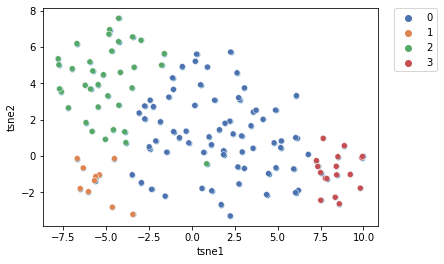

In [250]:
#Evaluate SERVE using original tennis abstract df
serve_cluster_agglom = cluster_agglomerative(serve_df,4,linkage='ward')
player_distribution_agglom,results_agglom = evaluate(serve_df,serve_cluster_agglom)
tsne_plot(player_distribution_agglom,serve_cluster_agglom)

In [122]:
serve_cluster_agglom

,Return Cluster,Player
0,3,Ivo Karlovic
1,3,John Isner
2,3,Reilly Opelka
3,3,Goran Ivanisevic
4,3,Milos Raonic
...,...,...
128,1,Mats Wilander
129,2,Sergi Bruguera
130,2,Yoshihito Nishioka
131,2,Jimmy Connors


37

<AxesSubplot:title={'center':'Serve Cluster'}, xlabel='Player', ylabel='Unret%'>

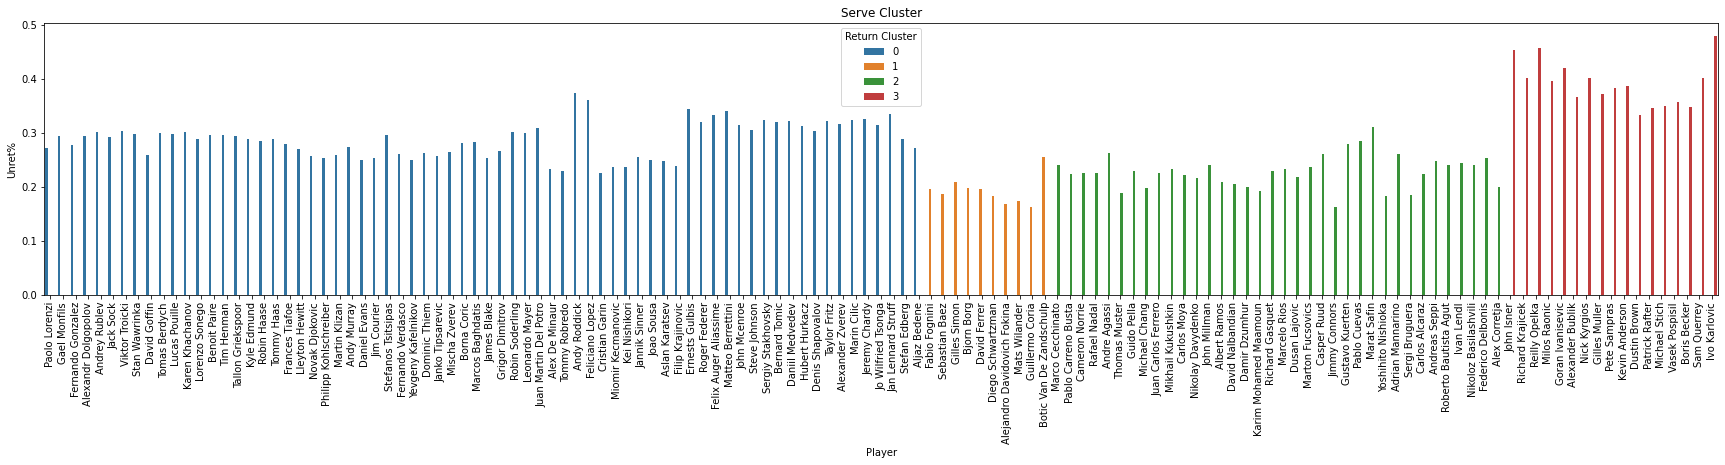

In [282]:
temp_df = pd.merge(serve_cluster_agglom,serve_df,on="Player")

plt.figure(figsize=(30, 5))
plt.xticks(rotation=90)
plt.title("Serve Cluster")
sns.barplot(data=temp_df[:].sort_values(by="Return Cluster"), x = "Player", y = "Unret%", hue = "Return Cluster")

In [303]:
pd.options.display.max_rows=50
# temp_df.head(133)
players_of_interest=["Roger Federer","Rafael Nadal","Novak Djokovic","Ivo Karlovic","John Isner","Milos Raonic","Andy Roddick","Pete Sampras","Dustin Brown","Alexander Bublik","Matteo Berrettini","Boris Becker","Felix Auger Aliassime",\
                    "John Mcenroe","Alexander Zverev", "Denis Shapovalov","Daniil Medvedev","Juan Martin Del Potro","Tomas Berdych","Benoit Paire","Stefanos Tsitsipas","Gael Monfils","Stan Wawrinka","Andrey Rublev","Dominic Thiem",\
                    "Frances Tiafoe","Kei Nishikori","Jannik Sinner","Carlos Alcaraz","Pablo Carreno Busta","Alex De Minaur","John Millman","Bjorn Borg","Michael Chang","Yoshihito Nishioka","Diego Schwartzman","David Ferrer","Reilly Opelka"]
len(temp_df[temp_df["Player"].isin(players_of_interest)])

38

<AxesSubplot:title={'center':'Serve Cluster'}, xlabel='Player', ylabel='Unret%'>

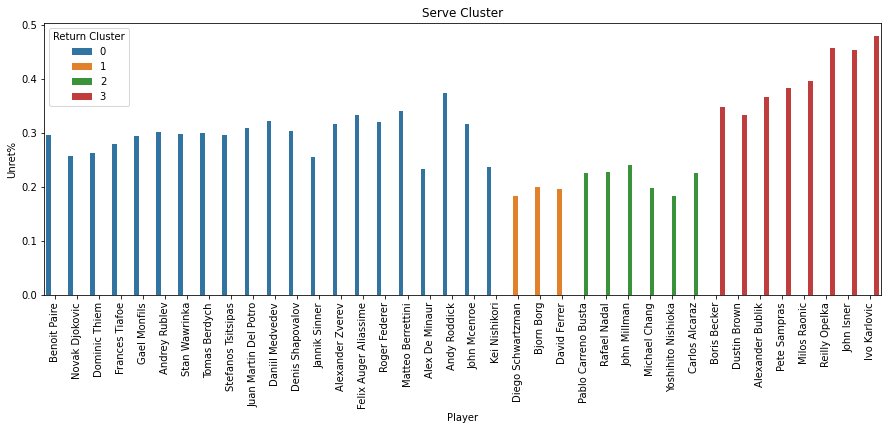

In [304]:
temp_df = pd.merge(serve_cluster_agglom,serve_df,on="Player")

plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
plt.title("Serve Cluster")
sns.barplot(data=temp_df[temp_df["Player"].isin(players_of_interest)].sort_values(by="Return Cluster"), x = "Player", y = "Unret%", hue = "Return Cluster")

<AxesSubplot:title={'center':'Serve Cluster'}, xlabel='Player', ylabel='Unret%'>

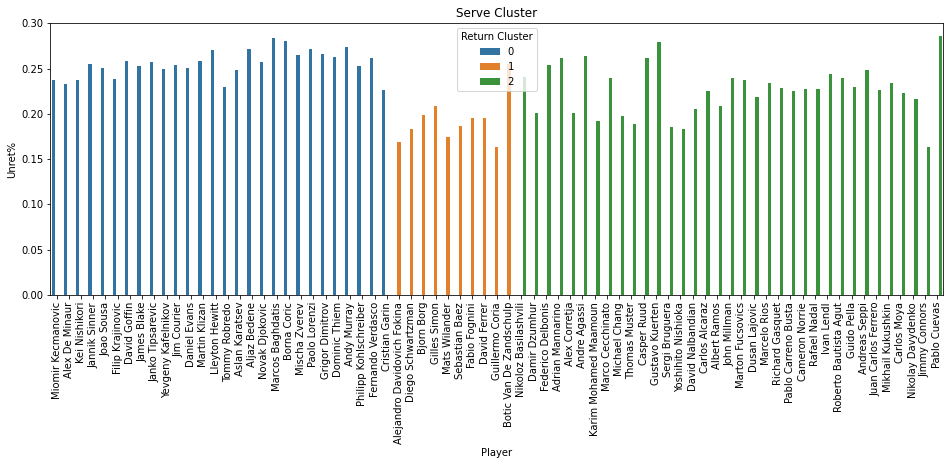

In [132]:
plt.figure(figsize=(16, 5))
plt.xticks(rotation=90)
plt.title("Serve Cluster")
sns.barplot(data=temp_df[60:].sort_values(by="Return Cluster"), x = "Player", y = "Unret%", hue = "Return Cluster")

[1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 1 1 3 3 3 1 1 3 3 3 3 1 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 0 2 3 3 3 3 2 0 0 2 0
 0 2 0 3 3 0 0 3 3 0 3 0 0 2 0 0 2 2 0 0 2 2 0 2 2 2 2 0 0 2 2 0 0 2 0 2 2
 2 2 0 2 0 2 2 0 0 2 0 0 0 2 2 0 0 0 2 2 2 0]
3    49
0    32
2    30
1    22
Name: Return Cluster, dtype: int64
Cluster Results:
---Evaluating Cluster 0---
Size of Cluster: 32
Intra-cluster Distance Avg: 10.21
Inter-cluster Distance Avg: 29.73
% Difference (Inter - Intra) for Cluster 0: 191.12%
--------------------------------------------------
---Evaluating Cluster 1---
Size of Cluster: 22
Intra-cluster Distance Avg: 10.88
Inter-cluster Distance Avg: 48.06
% Difference (Inter - Intra) for Cluster 1: 341.83%
--------------------------------------------------
---Evaluating Cluster 2---
Size of Cluster: 30
Intra-cluster Distance Avg: 9.68
Inter-cluster Distance Avg: 33.70
% Difference (Inter - Intra) for Cluster 2: 248.04%
-------------------------------------------

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

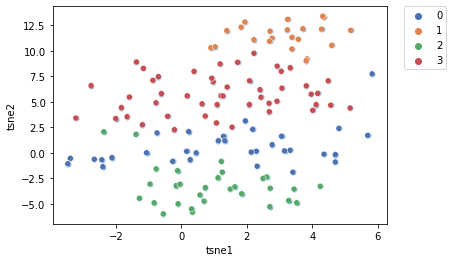

In [255]:
#Evaluate SERVE using original tennis abstract df
serve_cluster_kmeans = cluster_kmeans(serve_df,4,n_init=100)
player_distribution_kmeans,results_kmeans = evaluate(serve_df,serve_cluster_kmeans)
tsne_plot(player_distribution_kmeans,serve_cluster_kmeans)

<AxesSubplot:title={'center':'Serve Cluster'}, xlabel='Player', ylabel='Unret%'>

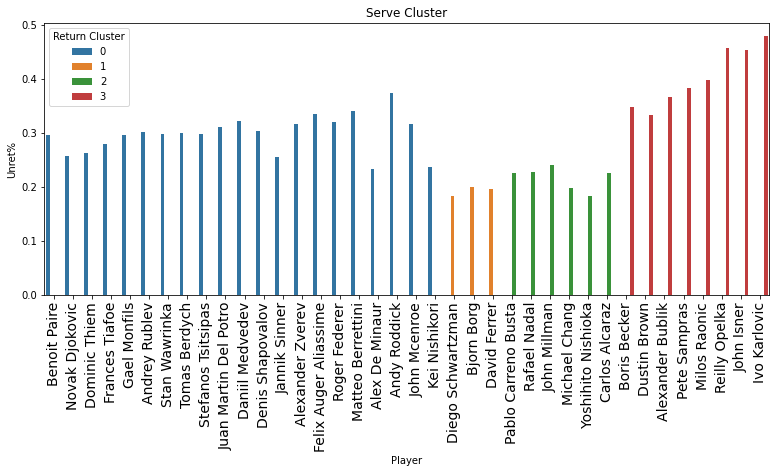

In [320]:
temp_df = pd.merge(serve_cluster_agglom,serve_df,on="Player")
plt.figure(figsize=(13, 5))
plt.xticks(fontsize=14,rotation=90)
plt.title("Serve Cluster")
# sns.barplot(data=temp_df[:].sort_values(by="Return Cluster"), x = "Player", y = "Unret%", hue = "Return Cluster")
sns.barplot(data=temp_df[temp_df["Player"].isin(players_of_interest)].sort_values(by="Return Cluster"), x = "Player", y = "Unret%", hue = "Return Cluster")

In [300]:
temp_df[temp_df["Player"].str.contains("Opelka")]

,Return Cluster,Player,Unret%,<=3 W%,RiP W%,SvImpact,1st: Unret%,<=3 W%.1,RiP W%.1,SvImpact.1,D Wide%,A Wide%,BP Wide%,2nd: Unret%,<=3 W%.2,RiP W%.2,D Wide%.1,A Wide%.1,BP Wide%.1,2ndAgg
2,1,Reilly Opelka,0.457,0.582,0.483,0.511,0.571,0.685,0.502,0.651,0.5,0.432,0.424,0.26,0.418,0.459,0.333,0.542,0.804,33


In [ ]:
serve_df

,Player,Unret%,<=3 W%,RiP W%,SvImpact,1st: Unret%,<=3 W%.1,RiP W%.1,SvImpact.1,D Wide%,A Wide%,BP Wide%,2nd: Unret%,<=3 W%.2,RiP W%.2,D Wide%.1,A Wide%.1,BP Wide%.1,2ndAgg
0,Ivo Karlovic,0.480,0.632,0.509,0.553,0.590,0.748,0.570,0.701,0.429,0.569,0.575,0.316,0.480,0.427,0.264,0.302,0.143,126
1,John Isner,0.454,0.590,0.482,0.520,0.540,0.671,0.508,0.633,0.500,0.451,0.585,0.268,0.430,0.440,0.211,0.519,0.690,33
2,Reilly Opelka,0.457,0.582,0.483,0.511,0.571,0.685,0.502,0.651,0.500,0.432,0.424,0.260,0.418,0.459,0.333,0.542,0.804,33
3,Goran Ivanisevic,0.421,0.539,0.498,0.474,0.589,0.721,0.554,0.686,0.381,0.550,0.568,0.263,0.383,0.454,0.169,0.517,0.656,119
4,Milos Raonic,0.397,0.540,0.516,0.471,0.520,0.681,0.573,0.638,0.536,0.502,0.455,0.214,0.341,0.450,0.281,0.544,0.718,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Mats Wilander,0.174,0.256,0.504,0.234,0.204,0.303,0.524,0.292,0.521,0.461,0.456,0.137,0.197,0.457,0.355,0.360,0.333,-9
129,Sergi Bruguera,0.185,0.261,0.521,0.234,0.233,0.319,0.564,0.315,0.477,0.603,0.644,0.123,0.191,0.458,0.203,0.595,0.725,5
130,Yoshihito Nishioka,0.183,0.259,0.519,0.233,0.205,0.289,0.516,0.283,0.140,0.520,0.545,0.154,0.219,0.524,0.105,0.565,0.692,5
131,Jimmy Connors,0.163,0.251,0.499,0.232,0.187,0.284,0.508,0.289,0.259,0.590,0.650,0.143,0.227,0.478,0.215,0.494,0.593,27


[3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 1 0 2 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 0 0 2 0 2 2
 2 2 2 2 1 2 2 1 1 2 1 2 1 2 2 1 1 1 2 2 2 1]
0    70
2    36
3    17
1    10
Name: Return Cluster, dtype: int64
Cluster Results:
---Evaluating Cluster 0---
Size of Cluster: 57
Intra-cluster Distance Avg: 28.14
Inter-cluster Distance Avg: 46.32
% Difference (Inter - Intra) for Cluster 0: 64.59%
--------------------------------------------------
---Evaluating Cluster 1---
Size of Cluster: 7
Intra-cluster Distance Avg: 24.95
Inter-cluster Distance Avg: 55.82
% Difference (Inter - Intra) for Cluster 1: 123.70%
--------------------------------------------------
---Evaluating Cluster 2---
Size of Cluster: 33
Intra-cluster Distance Avg: 27.58
Inter-cluster Distance Avg: 49.83
% Difference (Inter - Intra) for Cluster 2: 80.68%
---------------------------------------------

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

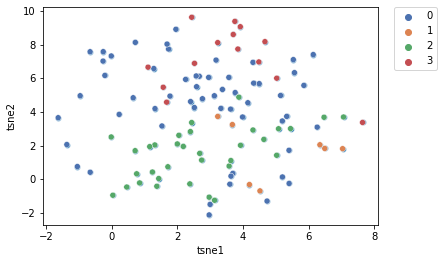

In [278]:
#Evaluate SERVE using original tennis abstract df, evaluating with PCSP serve features (36 features)

serve_cluster_agglom = cluster_agglomerative(serve_df,4,linkage='ward')
player_distribution_agglom,results_agglom = evaluate(eval_df_serve,serve_cluster_agglom)
tsne_plot(player_distribution_agglom,serve_cluster_agglom)

[1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 1 1 3 3 3 1 1 3 3 3 3 1 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 0 2 3 3 3 3 2 0 0 2 0
 0 2 0 3 3 0 0 3 3 0 3 0 0 2 0 0 2 2 0 0 2 2 0 2 2 2 2 0 0 2 2 0 0 2 0 2 2
 2 2 0 2 0 2 2 0 0 2 0 0 0 2 2 0 0 0 2 2 2 0]
3    49
0    32
2    30
1    22
Name: Return Cluster, dtype: int64
Cluster Results:
---Evaluating Cluster 0---
Size of Cluster: 24
Intra-cluster Distance Avg: 28.49
Inter-cluster Distance Avg: 44.78
% Difference (Inter - Intra) for Cluster 0: 57.15%
--------------------------------------------------
---Evaluating Cluster 1---
Size of Cluster: 19
Intra-cluster Distance Avg: 44.95
Inter-cluster Distance Avg: 47.78
% Difference (Inter - Intra) for Cluster 1: 6.28%
--------------------------------------------------
---Evaluating Cluster 2---
Size of Cluster: 27
Intra-cluster Distance Avg: 28.49
Inter-cluster Distance Avg: 50.40
% Difference (Inter - Intra) for Cluster 2: 76.94%
----------------------------------------------

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

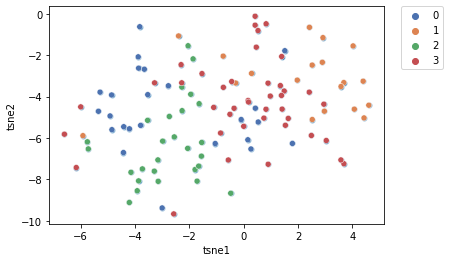

In [257]:
serve_cluster_kmeans = cluster_kmeans(serve_df,4)
player_distribution_kmeans,results_kmeans = evaluate(eval_df_serve,serve_cluster_kmeans)
tsne_plot(player_distribution_kmeans,serve_cluster_kmeans)

-1    102
 3     12
 2      4
 5      3
 0      2
 1      2
 4      2
 6      2
 7      2
 8      2
Name: Return Cluster, dtype: int64
Cluster Results:
---Evaluating Cluster 0---
Size of Cluster: 2
Intra-cluster Distance Avg: 0.90
Inter-cluster Distance Avg: 24.25
% Difference (Inter - Intra) for Cluster 0: 2601.36%
--------------------------------------------------
---Evaluating Cluster 1---
Size of Cluster: 2
Intra-cluster Distance Avg: 0.93
Inter-cluster Distance Avg: 24.32
% Difference (Inter - Intra) for Cluster 1: 2517.77%
--------------------------------------------------
---Evaluating Cluster 2---
Size of Cluster: 4
Intra-cluster Distance Avg: 1.61
Inter-cluster Distance Avg: 23.83
% Difference (Inter - Intra) for Cluster 2: 1383.18%
--------------------------------------------------
---Evaluating Cluster 3---
Size of Cluster: 12
Intra-cluster Distance Avg: 4.21
Inter-cluster Distance Avg: 22.42
% Difference (Inter - Intra) for Cluster 3: 431.90%
-------------------------------

/Users/Aaron/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/Aaron/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Size of Cluster: 0
Intra-cluster Distance Avg: nan
Inter-cluster Distance Avg: nan
% Difference (Inter - Intra) for Cluster 9: nan%
--------------------------------------------------
Overall Average of % Difference (Inter-Intra): nan%


<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

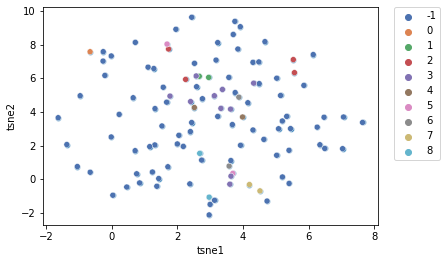

In [233]:
serve_cluster_dbscan = cluster_dbscan(serve_df,eps=2)
player_distribution_dbscan,results_dbscan = evaluate(serve_df,serve_cluster_dbscan)
tsne_plot(player_distribution_agglom,serve_cluster_dbscan)

 2    65
-1    49
 1     6
 6     3
 0     2
 3     2
 4     2
 5     2
 7     2
Name: Return Cluster, dtype: int64
Return Cluster:
---Evaluating Cluster 0---
Size of Cluster: 2
Intra-cluster Distance Avg: 1.4326
Inter-cluster Distance Avg: 77.2583
% Difference (Inter - Intra) for Return Cluster 0: 5292.8604%
--------------------------------------------------
---Evaluating Cluster 1---
Size of Cluster: 6
Intra-cluster Distance Avg: 3.8508
Inter-cluster Distance Avg: 41.9344
% Difference (Inter - Intra) for Return Cluster 1: 988.9812%
--------------------------------------------------
---Evaluating Cluster 2---
Size of Cluster: 65
Intra-cluster Distance Avg: 8.9656
Inter-cluster Distance Avg: 27.5380
% Difference (Inter - Intra) for Return Cluster 2: 207.1521%
--------------------------------------------------
---Evaluating Cluster 3---
Size of Cluster: 2
Intra-cluster Distance Avg: 1.1231
Inter-cluster Distance Avg: 40.2763
% Difference (Inter - Intra) for Return Cluster 3: 3486.2975%


/Users/Aaron/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/Aaron/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Size of Cluster: 0
Intra-cluster Distance Avg: nan
Inter-cluster Distance Avg: nan
% Difference (Inter - Intra) for Return Cluster 8: nan%
--------------------------------------------------


<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

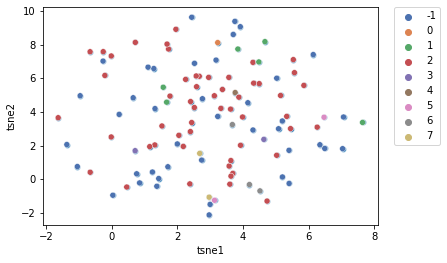

In [100]:
serve_cluster_dbscan = cluster_dbscan(serve_df,eps=2.5)
player_distribution_dbscan,results_dbscan = evaluate(serve_df,serve_cluster_dbscan)
tsne_plot(player_distribution_agglom,serve_cluster_dbscan)

### Return

In [149]:
return_df.columns

Index(['Player', 'RiP%', 'RiP W%', 'RetWnr%', 'Wnr FH%', 'RDI', 'Slice%',
       '1st: RiP%', '1st: RiP W%', '1st: RetWnr%', '1st: RDI', '1st: Slice%',
       '2nd: RiP%', '2nd: RiP W%', '2nd: RetWnr%', '2nd: RDI', '2nd: Slice%'],
      dtype='object')

[0 2 0 0 2 0 2 0 0 0 0 3 3 0 0 0 0 0 3 2 2 3 0 0 3 0 3 0 0 0 0 3 3 0 0 1 3
 1 0 0 0 3 3 2 2 3 0 0 2 3 2 0 3 0 3 3 0 3 0 3 3 2 0 2 3 2 3 0 3 0 0 0 3 3
 3 0 2 1 3 3 2 2 1 3 2 2 3 2 2 3 3 3 0 2 3 3 0 0 0 3 3 3 2 1 2 3 3 2 1 1 3
 3 3 0 1 3 1 2 2 3 2 2 0 0 2 2 1 0 2 2 1 1 0]
0    46
3    44
2    31
1    12
Name: Return Cluster, dtype: int64
Cluster Results:
---Evaluating Cluster 0---
Size of Cluster: 46
Intra-cluster Distance Avg: 8.55
Inter-cluster Distance Avg: 25.83
% Difference (Inter - Intra) for Cluster 0: 202.14%
--------------------------------------------------
---Evaluating Cluster 1---
Size of Cluster: 12
Intra-cluster Distance Avg: 16.25
Inter-cluster Distance Avg: 61.83
% Difference (Inter - Intra) for Cluster 1: 280.55%
--------------------------------------------------
---Evaluating Cluster 2---
Size of Cluster: 31
Intra-cluster Distance Avg: 11.43
Inter-cluster Distance Avg: 24.38
% Difference (Inter - Intra) for Cluster 2: 113.29%
-------------------------------------------

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

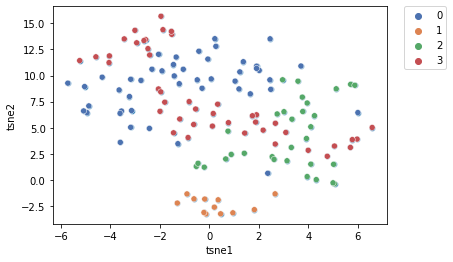

In [260]:
#Clustering and Evaluating with the same Feature Set
return_cluster_agglom = cluster_agglomerative(return_df,4,linkage='ward')
player_distribution_agglom,results_agglom = evaluate(return_df,return_cluster_agglom)
tsne_plot(player_distribution_agglom,return_cluster_agglom)

In [150]:
eval_df_return

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,Player
Guillermo Coria,0.023810,0.185714,0.004762,0.004762,0.004762,0.114286,0.004762,0.005782,0.061905,0.585714,0.009524,0.000938,0.047319,0.451104,0.009464,0.006309,0.006309,0.028391,0.007200,0.012276,0.059937,0.391167,0.012092,0.000994,0.010526,0.084211,0.011589,0.008945,0.029968,0.189474,0.011752,0.009108,0.042105,0.652632,0.021053,0.000522,0.009524,0.114286,0.009524,0.004233,0.028571,0.161905,0.009524,0.009524,0.009524,0.638095,0.009524,0.00063,0.044118,0.161765,0.029412,0.014706,0.044118,0.102941,0.017570,0.014706,0.044118,0.544118,0.020139,0.002510,0.015707,0.026178,0.005236,0.005236,0.047120,0.329843,0.011614,0.005236,0.073298,0.476440,0.015707,0.001297,Guillermo Coria
Mats Wilander,0.034057,0.074257,0.004950,0.005520,0.029703,0.133663,0.034653,0.014851,0.069307,0.633663,0.004950,0.000938,0.018587,0.301115,0.013011,0.005576,0.035316,0.092937,0.009294,0.014870,0.029740,0.460967,0.016729,0.001859,0.031746,0.079365,0.011589,0.021164,0.042328,0.089947,0.011752,0.015873,0.063492,0.645503,0.010582,0.000522,0.089552,0.134328,0.004443,0.014925,0.037313,0.097015,0.004623,0.014925,0.104478,0.507463,0.007805,0.00063,0.037826,0.266667,0.022222,0.022222,0.026794,0.072150,0.044444,0.021657,0.044444,0.600000,0.020139,0.002510,0.052109,0.133995,0.007444,0.022333,0.027295,0.161290,0.002481,0.015918,0.037221,0.540943,0.012407,0.002481,Mats Wilander
Marton Fucsovics,0.036585,0.158537,0.012195,0.005520,0.054878,0.091463,0.003971,0.005782,0.073171,0.567073,0.006098,0.000938,0.056701,0.453608,0.010309,0.008378,0.015464,0.010309,0.007200,0.012276,0.056701,0.396907,0.012092,0.000994,0.028205,0.083333,0.011589,0.041667,0.029968,0.041667,0.041667,0.009108,0.051285,0.750000,0.041667,0.000522,0.098901,0.208791,0.004443,0.004233,0.021978,0.087912,0.004623,0.010117,0.076923,0.494505,0.010989,0.00063,0.037826,0.240000,0.022007,0.012550,0.080000,0.120000,0.017570,0.021657,0.080000,0.480000,0.020139,0.002510,0.050725,0.130435,0.008299,0.014493,0.043478,0.072464,0.011614,0.007246,0.130435,0.543478,0.007246,0.001297,Marton Fucsovics
Sergi Bruguera,0.034014,0.278912,0.013605,0.013605,0.034014,0.061224,0.003971,0.006803,0.074830,0.469388,0.013605,0.000938,0.031646,0.474684,0.009494,0.003165,0.025316,0.063291,0.009494,0.012276,0.041139,0.329114,0.012658,0.000994,0.040323,0.241935,0.016129,0.040323,0.008065,0.072581,0.008065,0.008065,0.040323,0.500000,0.024194,0.000522,0.040000,0.146667,0.004443,0.004233,0.013333,0.186667,0.040000,0.013333,0.013333,0.546667,0.007805,0.00063,0.037826,0.245614,0.035088,0.012550,0.017544,0.140351,0.017570,0.021657,0.087719,0.456140,0.017544,0.002510,0.093750,0.182292,0.010417,0.010417,0.015625,0.197917,0.015625,0.015918,0.083333,0.390625,0.012417,0.001297,Sergi Bruguera
Andy Murray,0.038594,0.241935,0.005760,0.010369,0.016129,0.102535,0.001728,0.002880,0.058756,0.514401,0.005760,0.001152,0.058554,0.450442,0.016683,0.015047,0.014720,0.034020,0.004907,0.004907,0.041871,0.349362,0.008505,0.000981,0.029712,0.199629,0.017642,0.016713,0.012999,0.092851,0.005571,0.007428,0.038069,0.556175,0.022284,0.000929,0.040764,0.249682,0.003822,0.003185,0.021656,0.066242,0.004459,0.008280,0.059873,0.537580,0.004459,0.00063,0.030992,0.233471,0.006198,0.002066,0.020661,0.103306,0.024793,0.014463,0.055785,0.491736,0.014463,0.002066,0.031439,0.122727,0.004924,0.005682,0.049242,0.209470,0.007197,0.012879,0.069318,0.481818,0.004545,0.000758,Andy Murray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dustin Brown,0.031915,0.159574,0.010638,0.095745,0.042553,0.127660,0.010638,0.010638,0.063830,0.404255,0.03

[0 2 0 0 2 0 2 0 0 0 0 3 3 0 0 0 0 0 3 2 2 3 0 0 3 0 3 0 0 0 0 3 3 0 0 1 3
 1 0 0 0 3 3 2 2 3 0 0 2 3 2 0 3 0 3 3 0 3 0 3 3 2 0 2 3 2 3 0 3 0 0 0 3 3
 3 0 2 1 3 3 2 2 1 3 2 2 3 2 2 3 3 3 0 2 3 3 0 0 0 3 3 3 2 1 2 3 3 2 1 1 3
 3 3 0 1 3 1 2 2 3 2 2 0 0 2 2 1 0 2 2 1 1 0]
0    46
3    44
2    31
1    12
Name: Return Cluster, dtype: int64
Cluster Results:
---Evaluating Cluster 0---
Size of Cluster: 37
Intra-cluster Distance Avg: 68.05
Inter-cluster Distance Avg: 77.33
% Difference (Inter - Intra) for Cluster 0: 13.64%
--------------------------------------------------
---Evaluating Cluster 1---
Size of Cluster: 11
Intra-cluster Distance Avg: 89.88
Inter-cluster Distance Avg: 94.52
% Difference (Inter - Intra) for Cluster 1: 5.17%
--------------------------------------------------
---Evaluating Cluster 2---
Size of Cluster: 29
Intra-cluster Distance Avg: 66.51
Inter-cluster Distance Avg: 76.59
% Difference (Inter - Intra) for Cluster 2: 15.14%
----------------------------------------------

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

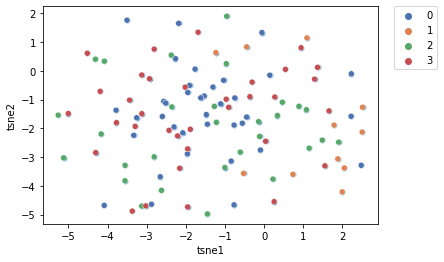

In [264]:
#Clustering and Evaluating with different Feature sets
return_cluster_agglom = cluster_agglomerative(return_df,4,linkage='ward')
player_distribution_agglom,results_agglom = evaluate(eval_df_return,return_cluster_agglom)
tsne_plot(player_distribution_agglom,return_cluster_agglom)

In [ ]:
df_v5(return_data_133)

In [ ]:
# eval_df3[eval_df3["Player"].isin(list(return_cluster_agglom[return_cluster_agglom["Return Cluster"]==3]["Player"]))]
eval_df3.merge(return_cluster_agglom).groupby('Return Cluster').mean()

In [ ]:
return_cluster_agglom[return_cluster_agglom["Return Cluster"]==1]["Player"]

In [ ]:
return_cluster_agglom = cluster_agglomerative(return_df,4,'ward')
# player_distribution_agglom,results_agglom = evaluate(return_df,return_cluster_agglom)

# Evaluate with the 'eval_df' instead of the original clustering df, eval_df = 72 features vs clustering df = original 16 features
player_distribution_agglom,results_agglom = evaluate(eval_df3,return_cluster_agglom)
tsne_plot(player_distribution_agglom,return_cluster_agglom)

In [ ]:
# eval_df2 = 24 features vs clustering df = original 16 features
player_distribution_agglom,results_agglom = evaluate(eval_df3,return_cluster_agglom)
tsne_plot(player_distribution_agglom,return_cluster_agglom)

In [ ]:
# #scaled vs non-scaled evaluation
# return_cluster_agglom = cluster_agglomerative(return_df,4)
# player_distribution_agglom,results_agglom = evaluate(return_df,return_cluster_agglom)
# tsne_plot(player_distribution_agglom,return_cluster_agglom)

using Kmeans

[1 3 1 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 2 1 1 1 0 1 3 3 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 3 0 1 0 1 1 1 0 1
 1 1 0 2 1 0 3 3 2 1 3 0 1 0 0 0 0 0 0 3 1 1 1 1 1 1 0 0 0 2 0 0 0 0 0 2 1
 1 0 1 2 0 2 3 0 0 0 0 1 0 0 0 2 2 0 0 2 2 0]
1    68
0    40
3    13
2    12
Name: Return Cluster, dtype: int64
Cluster Results:
---Evaluating Cluster 0---
Size of Cluster: 40
Intra-cluster Distance Avg: 8.01
Inter-cluster Distance Avg: 24.30
% Difference (Inter - Intra) for Cluster 0: 203.35%
--------------------------------------------------
---Evaluating Cluster 1---
Size of Cluster: 68
Intra-cluster Distance Avg: 7.25
Inter-cluster Distance Avg: 31.53
% Difference (Inter - Intra) for Cluster 1: 334.98%
--------------------------------------------------
---Evaluating Cluster 2---
Size of Cluster: 12
Intra-cluster Distance Avg: 17.76
Inter-cluster Distance Avg: 62.13
% Difference (Inter - Intra) for Cluster 2: 249.81%
--------------------------------------------

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

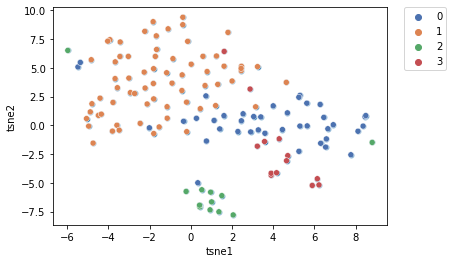

In [261]:
return_cluster_kmeans = cluster_kmeans(return_df,4,n_init=200)
# player_distribution_kmeans, results_kmeans = evaluate(return_df,return_cluster_kmeans)
player_distribution_kmeans, results_kmeans = evaluate(return_df,return_cluster_kmeans)
tsne_plot(player_distribution_kmeans,return_cluster_kmeans)

<AxesSubplot:title={'center':'Return Cluster'}, xlabel='Player', ylabel='RiP%'>

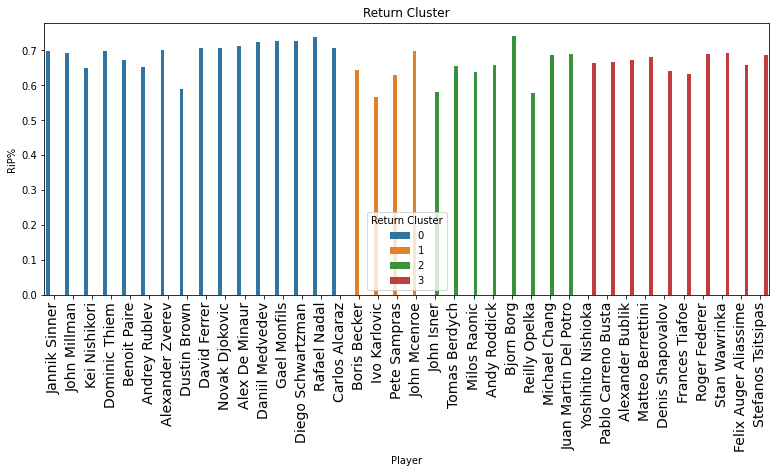

In [318]:
temp_df = pd.merge(return_cluster_agglom,return_df,on="Player")

plt.figure(figsize=(13, 5))
plt.xticks(fontsize=14,rotation=90)
plt.title("Return Cluster")
# sns.barplot(data=temp_df[:].sort_values(by="Return Cluster"), x = "Player", y = "RiP%", hue = "Return Cluster")
sns.barplot(data=temp_df[temp_df["Player"].isin(players_of_interest)].sort_values(by="Return Cluster"), x = "Player", y = "RiP%", hue = "Return Cluster")

In [152]:
eval_df_return

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,Player
Guillermo Coria,0.023810,0.185714,0.004762,0.004762,0.004762,0.114286,0.004762,0.005782,0.061905,0.585714,0.009524,0.000938,0.047319,0.451104,0.009464,0.006309,0.006309,0.028391,0.007200,0.012276,0.059937,0.391167,0.012092,0.000994,0.010526,0.084211,0.011589,0.008945,0.029968,0.189474,0.011752,0.009108,0.042105,0.652632,0.021053,0.000522,0.009524,0.114286,0.009524,0.004233,0.028571,0.161905,0.009524,0.009524,0.009524,0.638095,0.009524,0.00063,0.044118,0.161765,0.029412,0.014706,0.044118,0.102941,0.017570,0.014706,0.044118,0.544118,0.020139,0.002510,0.015707,0.026178,0.005236,0.005236,0.047120,0.329843,0.011614,0.005236,0.073298,0.476440,0.015707,0.001297,Guillermo Coria
Mats Wilander,0.034057,0.074257,0.004950,0.005520,0.029703,0.133663,0.034653,0.014851,0.069307,0.633663,0.004950,0.000938,0.018587,0.301115,0.013011,0.005576,0.035316,0.092937,0.009294,0.014870,0.029740,0.460967,0.016729,0.001859,0.031746,0.079365,0.011589,0.021164,0.042328,0.089947,0.011752,0.015873,0.063492,0.645503,0.010582,0.000522,0.089552,0.134328,0.004443,0.014925,0.037313,0.097015,0.004623,0.014925,0.104478,0.507463,0.007805,0.00063,0.037826,0.266667,0.022222,0.022222,0.026794,0.072150,0.044444,0.021657,0.044444,0.600000,0.020139,0.002510,0.052109,0.133995,0.007444,0.022333,0.027295,0.161290,0.002481,0.015918,0.037221,0.540943,0.012407,0.002481,Mats Wilander
Marton Fucsovics,0.036585,0.158537,0.012195,0.005520,0.054878,0.091463,0.003971,0.005782,0.073171,0.567073,0.006098,0.000938,0.056701,0.453608,0.010309,0.008378,0.015464,0.010309,0.007200,0.012276,0.056701,0.396907,0.012092,0.000994,0.028205,0.083333,0.011589,0.041667,0.029968,0.041667,0.041667,0.009108,0.051285,0.750000,0.041667,0.000522,0.098901,0.208791,0.004443,0.004233,0.021978,0.087912,0.004623,0.010117,0.076923,0.494505,0.010989,0.00063,0.037826,0.240000,0.022007,0.012550,0.080000,0.120000,0.017570,0.021657,0.080000,0.480000,0.020139,0.002510,0.050725,0.130435,0.008299,0.014493,0.043478,0.072464,0.011614,0.007246,0.130435,0.543478,0.007246,0.001297,Marton Fucsovics
Sergi Bruguera,0.034014,0.278912,0.013605,0.013605,0.034014,0.061224,0.003971,0.006803,0.074830,0.469388,0.013605,0.000938,0.031646,0.474684,0.009494,0.003165,0.025316,0.063291,0.009494,0.012276,0.041139,0.329114,0.012658,0.000994,0.040323,0.241935,0.016129,0.040323,0.008065,0.072581,0.008065,0.008065,0.040323,0.500000,0.024194,0.000522,0.040000,0.146667,0.004443,0.004233,0.013333,0.186667,0.040000,0.013333,0.013333,0.546667,0.007805,0.00063,0.037826,0.245614,0.035088,0.012550,0.017544,0.140351,0.017570,0.021657,0.087719,0.456140,0.017544,0.002510,0.093750,0.182292,0.010417,0.010417,0.015625,0.197917,0.015625,0.015918,0.083333,0.390625,0.012417,0.001297,Sergi Bruguera
Andy Murray,0.038594,0.241935,0.005760,0.010369,0.016129,0.102535,0.001728,0.002880,0.058756,0.514401,0.005760,0.001152,0.058554,0.450442,0.016683,0.015047,0.014720,0.034020,0.004907,0.004907,0.041871,0.349362,0.008505,0.000981,0.029712,0.199629,0.017642,0.016713,0.012999,0.092851,0.005571,0.007428,0.038069,0.556175,0.022284,0.000929,0.040764,0.249682,0.003822,0.003185,0.021656,0.066242,0.004459,0.008280,0.059873,0.537580,0.004459,0.00063,0.030992,0.233471,0.006198,0.002066,0.020661,0.103306,0.024793,0.014463,0.055785,0.491736,0.014463,0.002066,0.031439,0.122727,0.004924,0.005682,0.049242,0.209470,0.007197,0.012879,0.069318,0.481818,0.004545,0.000758,Andy Murray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dustin Brown,0.031915,0.159574,0.010638,0.095745,0.042553,0.127660,0.010638,0.010638,0.063830,0.404255,0.03

[1 3 1 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 2 1 1 1 0 1 3 3 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 3 0 1 0 1 1 1 0 1
 1 1 0 2 1 0 3 3 2 1 3 0 1 0 0 0 0 0 0 3 1 1 1 1 1 1 0 0 0 2 0 0 0 0 0 2 1
 1 0 1 2 0 2 3 0 0 0 0 1 0 0 0 2 2 0 0 2 2 0]
1    68
0    40
3    13
2    12
Name: Return Cluster, dtype: int64
Cluster Results:
---Evaluating Cluster 0---
Size of Cluster: 31
Intra-cluster Distance Avg: 71.84
Inter-cluster Distance Avg: 75.02
% Difference (Inter - Intra) for Cluster 0: 4.43%
--------------------------------------------------
---Evaluating Cluster 1---
Size of Cluster: 56
Intra-cluster Distance Avg: 55.77
Inter-cluster Distance Avg: 92.86
% Difference (Inter - Intra) for Cluster 1: 66.50%
--------------------------------------------------
---Evaluating Cluster 2---
Size of Cluster: 11
Intra-cluster Distance Avg: 106.84
Inter-cluster Distance Avg: 104.80
% Difference (Inter - Intra) for Cluster 2: -1.91%
--------------------------------------------

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

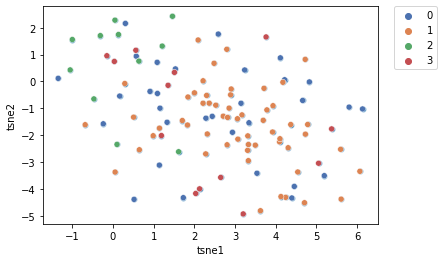

In [265]:
return_cluster_kmeans = cluster_kmeans(return_df,4,n_init=200)
# player_distribution_kmeans, results_kmeans = evaluate(return_df,return_cluster_kmeans)
player_distribution_kmeans, results_kmeans = evaluate(eval_df_return,return_cluster_kmeans)
tsne_plot(player_distribution_kmeans,return_cluster_kmeans)

In [155]:
#DBScan - density-based clustering

return_cluster_dbscan = cluster_dbscan(return_df,eps=2)
player_distribution_dbscan, results_dbscan = evaluate(return_df,return_cluster_dbscan)
tsne_plot(player_distribution_dbscan,return_cluster_dbscan)

-1    61
 0    55
 2     3
 4     3
 5     3
 1     2
 3     2
 6     2
 7     2
Name: Return Cluster, dtype: int64
Return Cluster:
---Evaluating Cluster 0---
Size of Cluster: 55
Intra-cluster Distance Avg: 5.5647
Inter-cluster Distance Avg: 26.2402
% Difference (Inter - Intra) for Return Cluster 0: 371.5508%
--------------------------------------------------
---Evaluating Cluster 1---
Size of Cluster: 2
Intra-cluster Distance Avg: 0.8119
Inter-cluster Distance Avg: 24.0959
% Difference (Inter - Intra) for Return Cluster 1: 2867.7381%
--------------------------------------------------
---Evaluating Cluster 2---
Size of Cluster: 3
Intra-cluster Distance Avg: 0.9263
Inter-cluster Distance Avg: 23.7959
% Difference (Inter - Intra) for Return Cluster 2: 2468.7878%
--------------------------------------------------
---Evaluating Cluster 3---
Size of Cluster: 2
Intra-cluster Distance Avg: 0.9642
Inter-cluster Distance Avg: 18.8365
% Difference (Inter - Intra) for Return Cluster 3: 1853.6186%

/Users/Aaron/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/Aaron/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
#Kmeans but with 100 as n_init

# return_cluster_kmeans = cluster_kmeans(return_df,4,n_init=100)
# player_distribution_kmeans, results_kmeans = evaluate(return_df,return_cluster_kmeans)
# tsne_plot(player_distribution_kmeans,return_cluster)

### Rally

- clustering df: rally_df (13)
- eval df: eval_df_rally (24)

In [ ]:
#eval_df features:
df_v7(data_133).feature

In [191]:
rally_df

,Player,RallyLen,RLen-Serve,RLen-Return,1-3 W%,4-6 W%,7-9 W%,10+ W%,FH/GS,BH Slice%,FHP/Match,FHP/100,BHP/Match,BHP/100
0,Dustin Brown,2.8,2.8,2.9,0.509,0.529,0.489,0.465,0.530,0.230,2.2,4.8,3.3,7.3
1,Bjorn Borg,5.0,5.3,4.7,0.546,0.529,0.515,0.558,0.456,0.120,12.5,6.7,12.4,6.3
2,Daniel Evans,4.3,4.4,4.2,0.499,0.498,0.504,0.517,0.482,0.746,8.7,7.4,1.8,5.8
3,Andre Agassi,3.9,4.2,3.6,0.497,0.526,0.558,0.524,0.465,0.093,12.0,9.3,7.2,5.3
4,Yoshihito Nishioka,4.8,5.6,3.9,0.469,0.484,0.554,0.509,0.504,0.104,7.9,5.1,6.4,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Reilly Opelka,3.0,2.8,3.2,0.521,0.469,0.405,0.425,0.543,0.155,0.3,0.4,-3.9,-5.7
129,Vasek Pospisil,3.3,3.3,3.2,0.496,0.498,0.468,0.472,0.562,0.337,4.9,5.1,-3.1,-6.1
130,Jeremy Chardy,3.4,3.3,3.6,0.481,0.473,0.457,0.442,0.595,0.331,4.6,3.8,-3.8,-6.6
131,Feliciano Lopez,3.6,3.2,4.0,0.494,0.439,0.444,0.429,0.529,0.724,-4.3,-3.8,-2.0,-7.1


[0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 0
 2 2 3 1 1 2 1 1 2 1 1 2 1 1 0 1 2 1 1 1 3 2 2 1 2 3 1 1 2 2 1 0 1 2 2 2 1
 2 2 2 2 1 2 1 1 2 1 3 1 2 1 2 3 3 2 3 3 3 1 2 3 2 0 3 2 3 1 2 1 1 2 2 3 3
 2 3 2 2 3 3 2 3 3 2 3 3 3 3 2 3 3 3 3 3 3 0]
1    57
2    38
3    29
0     9
Name: Return Cluster, dtype: int64
Cluster Results:
---Evaluating Cluster 0---
Size of Cluster: 9
Intra-cluster Distance Avg: 14.48
Inter-cluster Distance Avg: 34.28
% Difference (Inter - Intra) for Cluster 0: 136.79%
--------------------------------------------------
---Evaluating Cluster 1---
Size of Cluster: 57
Intra-cluster Distance Avg: 7.75
Inter-cluster Distance Avg: 23.40
% Difference (Inter - Intra) for Cluster 1: 201.86%
--------------------------------------------------
---Evaluating Cluster 2---
Size of Cluster: 38
Intra-cluster Distance Avg: 6.89
Inter-cluster Distance Avg: 17.39
% Difference (Inter - Intra) for Cluster 2: 152.44%
---------------------------------------------

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

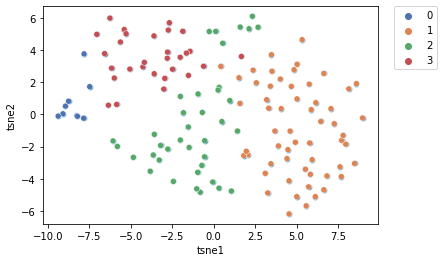

In [268]:
#Cluster RALLY using original tennis abstract DF
#Evaluate using same tennis abstract DF
rally_cluster_agglom = cluster_agglomerative(rally_df,4,linkage='ward')
player_distribution_agglom,results_agglom = evaluate(rally_df,rally_cluster_agglom)
tsne_plot(player_distribution_agglom,rally_cluster_agglom)

In [193]:
eval_df_rally

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Player
Guillermo Coria,0.021752,0.117825,0.111178,0.059215,0.064653,0.213897,0.180665,0.230816,0.000677,0.000677,0.000677,0.001353,0.138701,0.387686,0.200947,0.269283,0.086590,0.363677,0.154085,0.246448,0.016430,0.023979,0.057726,0.051066,Guillermo Coria
Mats Wilander,0.032065,0.195536,0.183904,0.104684,0.030179,0.147752,0.176674,0.129205,0.000613,0.002452,0.004905,0.000613,0.111588,0.244635,0.249540,0.385653,0.078641,0.460208,0.175527,0.228688,0.003146,0.013841,0.011953,0.027996,Mats Wilander
Marton Fucsovics,0.038981,0.052474,0.080960,0.038981,0.109445,0.287856,0.152924,0.238381,0.028242,0.054608,0.042042,0.061677,0.234940,0.253012,0.230924,0.281124,0.158613,0.335084,0.090336,0.242647,0.026261,0.016807,0.061975,0.068277,Marton Fucsovics
Sergi Bruguera,0.028369,0.133865,0.093972,0.056738,0.057624,0.268617,0.101950,0.258865,0.020295,0.022140,0.027675,0.016605,0.164207,0.299815,0.234317,0.214945,0.103499,0.397959,0.159378,0.178328,0.013120,0.015549,0.072400,0.059767,Sergi Bruguera
Andy Murray,0.042160,0.128701,0.125760,0.072162,0.063730,0.241127,0.110595,0.215766,0.000341,0.000853,0.000597,0.000853,0.149996,0.427901,0.205338,0.214121,0.123039,0.440684,0.130090,0.229214,0.009871,0.006170,0.021564,0.039368,Andy Murray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dustin Brown,0.051576,0.088825,0.088825,0.054441,0.117479,0.260745,0.100287,0.237822,0.028242,0.054608,0.004975,0.061677,0.228856,0.427861,0.174129,0.164179,0.218391,0.238506,0.172414,0.227011,0.025862,0.014368,0.043103,0.060345,Dustin Brown
John Isner,0.060957,0.058942,0.083123,0.026196,0.160202,0.205542,0.100756,0.304282,0.013092,0.017120,0.009063,0.010070,0.278953,0.201410,0.257805,0.212487,0.177743,0.234930,0.104070,0.231839,0.056157,0.023184,0.051520,0.120556,John Isner
Goran Ivanisevic,0.075682,0.105459,0.116625,0.070720,0.137717,0.146402,0.147643,0.199752,0.232836,0.307463,0.216418,0.186567,0.004478,0.020896,0.014925,0.016418,0.004454,0.350191,0.004454,0.189106,0.251670,0.240535,0.160356,0.338530,Goran Ivanisevic
Ivo Karlovic,0.077626,0.120244,0.071537,0.112633,0.138508,0.225266,0.050228,0.203957,0.005797,0.054608,0.002899,0.002899,0.321739,0.295652,0.197101,0.173913,0.284034,0.216807,0.203361,0.173109,0.023529,0.008403,0.047059,0.043697,Ivo Karlovic


[0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 0
 2 2 3 1 1 2 1 1 2 1 1 2 1 1 0 1 2 1 1 1 3 2 2 1 2 3 1 1 2 2 1 0 1 2 2 2 1
 2 2 2 2 1 2 1 1 2 1 3 1 2 1 2 3 3 2 3 3 3 1 2 3 2 0 3 2 3 1 2 1 1 2 2 3 3
 2 3 2 2 3 3 2 3 3 2 3 3 3 3 2 3 3 3 3 3 3 0]
1    57
2    38
3    29
0     9
Name: Return Cluster, dtype: int64
Cluster Results:
---Evaluating Cluster 0---
Size of Cluster: 9
Intra-cluster Distance Avg: 21.74
Inter-cluster Distance Avg: 37.40
% Difference (Inter - Intra) for Cluster 0: 72.04%
--------------------------------------------------
---Evaluating Cluster 1---
Size of Cluster: 52
Intra-cluster Distance Avg: 22.34
Inter-cluster Distance Avg: 26.65
% Difference (Inter - Intra) for Cluster 1: 19.32%
--------------------------------------------------
---Evaluating Cluster 2---
Size of Cluster: 35
Intra-cluster Distance Avg: 24.17
Inter-cluster Distance Avg: 24.29
% Difference (Inter - Intra) for Cluster 2: 0.48%
-----------------------------------------------

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

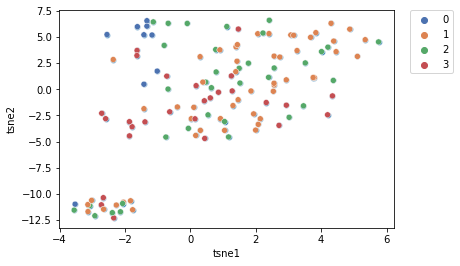

In [274]:
#Cluster RALLY using original tennis abstract DF
#Evaluate using same tennis abstract DF
rally_cluster_agglom = cluster_agglomerative(rally_df,4,linkage='ward')
player_distribution_agglom,results_agglom = evaluate(eval_df_rally,rally_cluster_agglom)
tsne_plot(player_distribution_agglom,rally_cluster_agglom)

In [194]:
#Using Kmeans


[2 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 3 1 1 1 1 0 1 2
 0 0 0 1 1 0 0 1 0 1 1 0 0 0 2 1 2 1 0 0 3 2 0 0 0 2 1 1 0 0 0 2 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 2 3 0 3 0 3 0 0 2 0 2 3 0 3 0 0 0 0 0 0 0 3
 0 3 0 0 3 3 0 3 3 0 3 3 3 3 0 3 3 3 3 3 3 2]
0    55
1    40
3    24
2    14
Name: Return Cluster, dtype: int64
Cluster Results:
---Evaluating Cluster 0---
Size of Cluster: 55
Intra-cluster Distance Avg: 6.09
Inter-cluster Distance Avg: 18.97
% Difference (Inter - Intra) for Cluster 0: 211.19%
--------------------------------------------------
---Evaluating Cluster 1---
Size of Cluster: 40
Intra-cluster Distance Avg: 7.80
Inter-cluster Distance Avg: 23.70
% Difference (Inter - Intra) for Cluster 1: 203.75%
--------------------------------------------------
---Evaluating Cluster 2---
Size of Cluster: 14
Intra-cluster Distance Avg: 13.95
Inter-cluster Distance Avg: 29.70
% Difference (Inter - Intra) for Cluster 2: 112.82%
--------------------------------------------

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

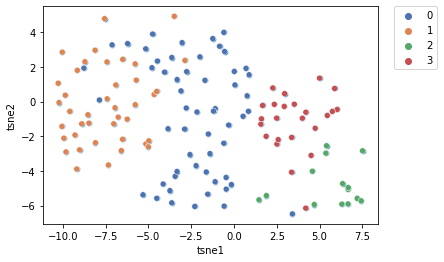

In [269]:
#Cluster RALLY using: original 13 tennis abstract DF
#Evaluate using: PCSP 24 features df
rally_cluster_kmeans = cluster_kmeans(rally_df,4)
player_distribution_kmeans,results_kmeans = evaluate(rally_df,rally_cluster_kmeans)
tsne_plot(player_distribution_kmeans,rally_cluster_kmeans)

[2 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 3 1 1 1 1 0 1 2
 0 0 0 1 1 0 0 1 0 1 1 0 0 0 2 1 2 1 0 0 3 2 0 0 0 2 1 1 0 0 0 2 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 2 3 0 3 0 3 0 0 2 0 2 3 0 3 0 0 0 0 0 0 0 3
 0 3 0 0 3 3 0 3 3 0 3 3 3 3 0 3 3 3 3 3 3 2]
0    55
1    40
3    24
2    14
Name: Return Cluster, dtype: int64
Cluster Results:
---Evaluating Cluster 0---
Size of Cluster: 50
Intra-cluster Distance Avg: 21.66
Inter-cluster Distance Avg: 26.30
% Difference (Inter - Intra) for Cluster 0: 21.40%
--------------------------------------------------
---Evaluating Cluster 1---
Size of Cluster: 37
Intra-cluster Distance Avg: 22.47
Inter-cluster Distance Avg: 27.32
% Difference (Inter - Intra) for Cluster 1: 21.61%
--------------------------------------------------
---Evaluating Cluster 2---
Size of Cluster: 14
Intra-cluster Distance Avg: 24.37
Inter-cluster Distance Avg: 34.23
% Difference (Inter - Intra) for Cluster 2: 40.45%
---------------------------------------------

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

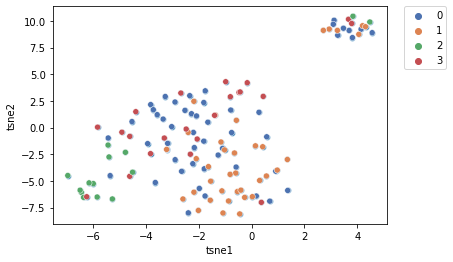

In [273]:
#Cluster RALLY using: original 13 tennis abstract DF
#Evaluate using: PCSP 24 features df
rally_cluster_kmeans = cluster_kmeans(rally_df,no_of_clusters=4)
player_distribution_kmeans,results_kmeans = evaluate(eval_df_rally,rally_cluster_kmeans)
tsne_plot(player_distribution_kmeans,rally_cluster_kmeans)

In [199]:
rally_df

,Player,RallyLen,RLen-Serve,RLen-Return,1-3 W%,4-6 W%,7-9 W%,10+ W%,FH/GS,BH Slice%,FHP/Match,FHP/100,BHP/Match,BHP/100
0,Dustin Brown,2.8,2.8,2.9,0.509,0.529,0.489,0.465,0.530,0.230,2.2,4.8,3.3,7.3
1,Bjorn Borg,5.0,5.3,4.7,0.546,0.529,0.515,0.558,0.456,0.120,12.5,6.7,12.4,6.3
2,Daniel Evans,4.3,4.4,4.2,0.499,0.498,0.504,0.517,0.482,0.746,8.7,7.4,1.8,5.8
3,Andre Agassi,3.9,4.2,3.6,0.497,0.526,0.558,0.524,0.465,0.093,12.0,9.3,7.2,5.3
4,Yoshihito Nishioka,4.8,5.6,3.9,0.469,0.484,0.554,0.509,0.504,0.104,7.9,5.1,6.4,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Reilly Opelka,3.0,2.8,3.2,0.521,0.469,0.405,0.425,0.543,0.155,0.3,0.4,-3.9,-5.7
129,Vasek Pospisil,3.3,3.3,3.2,0.496,0.498,0.468,0.472,0.562,0.337,4.9,5.1,-3.1,-6.1
130,Jeremy Chardy,3.4,3.3,3.6,0.481,0.473,0.457,0.442,0.595,0.331,4.6,3.8,-3.8,-6.6
131,Feliciano Lopez,3.6,3.2,4.0,0.494,0.439,0.444,0.429,0.529,0.724,-4.3,-3.8,-2.0,-7.1


In [201]:
temp_df

,Return Cluster,Player,RiP%,RiP W%,RetWnr%,Wnr FH%,RDI,Slice%,1st: RiP%,1st: RiP W%,1st: RetWnr%,1st: RDI,1st: Slice%,2nd: RiP%,2nd: RiP W%,2nd: RetWnr%,2nd: RDI,2nd: Slice%
0,2,Dustin Brown,0.589,0.536,0.068,0.435,1.98,0.131,0.581,0.498,0.062,1.93,0.186,0.717,0.609,0.094,2.04,0.041
1,1,Bjorn Borg,0.742,0.528,0.040,0.437,2.09,0.362,0.772,0.487,0.036,2.01,0.399,0.884,0.591,0.057,2.19,0.315
2,1,Daniel Evans,0.711,0.483,0.053,0.472,2.38,0.172,0.660,0.452,0.042,2.33,0.234,0.868,0.524,0.077,2.44,0.082
3,1,Andre Agassi,0.628,0.530,0.049,0.501,2.09,0.330,0.568,0.491,0.037,2.07,0.368,0.811,0.572,0.075,2.12,0.272
4,1,Yoshihito Nishioka,0.663,0.493,0.035,0.534,2.32,0.155,0.601,0.432,0.018,2.33,0.223,0.853,0.569,0.069,2.29,0.032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,3,Reilly Opelka,0.577,0.424,0.036,0.431,2.09,0.299,0.541,0.371,0.028,2.02,0.371,0.727,0.505,0.059,2.18,0.212
129,3,Vasek Pospisil,0.549,0.487,0.045,0.521,2.13,0.225,0.523,0.456,0.032,1.98,0.297,0.679,0.537,0.077,2.28,0.154
130,3,Jeremy Chardy,0.633,0.453,0.040,0.588,2.15,0.182,0.597,0.411,0.034,2.13,0.239,0.757,0.515,0.056,2.18,0.099
131,3,Feliciano Lopez,0.624,0.409,0.053,0.359,2.01,0.192,0.585,0.384,0.064,1.87,0.299,0.770,0.446,0.039,2.13,0.092


<AxesSubplot:title={'center':'Rally Cluster'}, xlabel='Player', ylabel='RallyLen'>

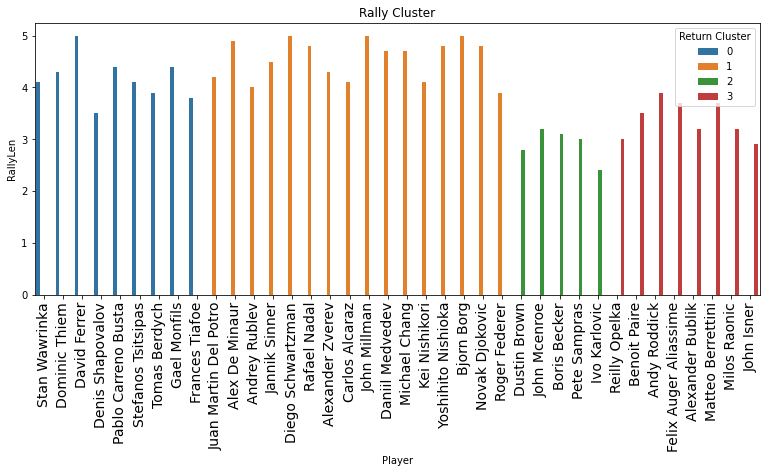

In [316]:
temp_df = pd.merge(rally_cluster_kmeans,rally_df,on="Player")
plt.figure(figsize=(13, 5))
plt.xticks(fontsize=14, rotation=90)
plt.title("Rally Cluster")
# sns.barplot(data=temp_df[:].sort_values(by="Return Cluster"), x = "Player", y = "RallyLen", hue = "Return Cluster")
sns.barplot(data=temp_df[temp_df["Player"].isin(players_of_interest)].sort_values(by="Return Cluster"), x = "Player", y = "RallyLen", hue = "Return Cluster")

In [ ]:
# pd.options.display.max_rows=30
# rally_cluster_agglom.head(20)

In [ ]:
# rally_cluster_agglom[rally_cluster_agglom["Return Cluster"]==1]
rally_cluster_agglom[rally_cluster_agglom["Player"].isin(['Novak Djokovic','Rafael Nadal','Roger Federer'])]

In [ ]:
rally_df_original.columns
rally_df_original[rally_df_original["Player"].isin(['Novak Djokovic','Rafael Nadal','Roger Federer'])]

In [ ]:
#Cluster RALLY using original tennis abstract DF
#Evaluate using same tennis abstract DF
rally_cluster_agglom = cluster_agglomerative(rally_df,4,linkage='ward')
player_distribution_agglom,results_agglom = evaluate(eval_df_rally,rally_cluster_agglom)
tsne_plot(player_distribution_agglom,rally_cluster_agglom)

In [ ]:
#Cluster RALLY using 24 PCSP features df
#Evaluate using same PCSP features df
rally_cluster_agglom = cluster_agglomerative(eval_df_rally,4,linkage='ward')
player_distribution_agglom,results_agglom = evaluate(eval_df_rally,rally_cluster_agglom)
tsne_plot(player_distribution_agglom,rally_cluster_agglom)

In [ ]:
# rally_cluster_agglom[rally_cluster_agglom["Return Cluster"]==1]
rally_cluster_agglom[rally_cluster_agglom["Player"].isin(['Novak Djokovic','Rafael Nadal','Roger Federer'])]

In [ ]:
#Cluster RALLY using: original 13 tennis abstract DF
#Evaluate using: PCSP 24 features df
rally_cluster_agglom = cluster_agglomerative(rally_df,4,linkage='ward')
player_distribution_agglom,results_agglom = evaluate(eval_df_rally,rally_cluster_agglom)
tsne_plot(player_distribution_agglom,rally_cluster_agglom)

In [ ]:
#Cluster RALLY using: original 13 tennis abstract DF
#Evaluate using: PCSP 24 features df
rally_cluster_kmeans = cluster_kmeans(rally_df,4)
player_distribution_kmeans,results_kmeans = evaluate(eval_df_rally,rally_cluster_kmeans)
tsne_plot(player_distribution_kmeans,rally_cluster_kmeans)

# Excel Report Generation

In [275]:
# pd.DataFrame(results)
results_df_agglom = pd.DataFrame.from_dict(results_agglom, orient='index',
                       columns=['Size of Cluster', 'Intra-cluster Distance Avg', 'Inter-cluster Distance Avg', '% Difference (Inter - Intra)'])
results_df_agglom['Cluster'] = results_df_agglom.index
cols = list(results_df_agglom.columns)
results_df_agglom = results_df_agglom[cols[-1:]+cols[:-1]]
results_df_agglom.loc['Overall Average'] = results_df_agglom.mean()
results_df_agglom

,Cluster,Size of Cluster,Intra-cluster Distance Avg,Inter-cluster Distance Avg,% Difference (Inter - Intra)
0,0.0,9.00,21.736816,37.396770,72.043455
1,1.0,52.00,22.335334,26.650491,19.319865
2,2.0,35.00,24.171774,24.286985,0.476636
3,3.0,27.00,19.334891,28.385143,46.807873
Overall Average,1.5,30.75,21.894704,29.179847,34.661957


In [276]:
results_df_kmeans = pd.DataFrame.from_dict(results_kmeans, orient='index',
                       columns=['Size of Cluster', 'Intra-cluster Distance Avg', 'Inter-cluster Distance Avg', '% Difference (Inter - Intra)'])
results_df_kmeans['Cluster'] = results_df_kmeans.index
cols = list(results_df_kmeans.columns)
results_df_kmeans = results_df_kmeans[cols[-1:]+cols[:-1]]
results_df_kmeans.loc['Overall Average'] = results_df_kmeans.mean()
results_df_kmeans

,Cluster,Size of Cluster,Intra-cluster Distance Avg,Inter-cluster Distance Avg,% Difference (Inter - Intra)
0,0.0,50.00,21.662566,26.298938,21.402689
1,1.0,37.00,22.467518,27.322613,21.609398
2,2.0,14.00,24.372748,34.231723,40.450811
3,3.0,22.00,19.379510,27.932603,44.134717
Overall Average,1.5,30.75,21.970586,28.946469,31.899404


In [120]:
# Change the file_name of xls file before running

file_name = 'df_19TA'

with pd.ExcelWriter(f'results/{file_name}.xls') as writer:  
    # current_df_function(serve_data_133).to_excel(writer, sheet_name='features')
    serve_df.to_excel(writer, sheet_name='features')
    player_distribution_agglom.to_excel(writer, sheet_name='distributions')
    results_df_agglom.to_excel(writer, sheet_name='results_agglom',index=False)
    results_df_kmeans.to_excel(writer, sheet_name='results_kmeans',index=False)
    serve_cluster_agglom.to_excel(writer, sheet_name='agglom_clusters',index=False)
    serve_cluster_kmeans.to_excel(writer, sheet_name='kmeans_clusters',index=False)
    
    #output the scores too

In [121]:
# from PIL import Image
# from xlwt import Workbook
from xlrd import open_workbook
from xlutils.copy import copy as xl_copy


file_in = "results/tsne_plot.png"
img = Image.open(file_in)
file_out = 'test1.bmp'
print (len(img.split())) # test
if len(img.split()) == 4:
    # prevent IOError: cannot write mode RGBA as BMP
    r, g, b, a = img.split()
    img = Image.merge("RGB", (r, g, b))
    img.save(file_out)
else:
    img.save(file_out)

w = open_workbook(os.getcwd()+f'/results/{file_name}.xls',formatting_info=True)
wb = xl_copy(w)
# w = Workbook()
ws = wb.add_sheet('tsne_plot')
ws.insert_bitmap(file_out, 0, 0)
wb.save(f'results/{file_name}.xls')

4


# Storing Cluster Results for PCSP Population

In [277]:
%store serve_cluster_agglom
%store return_cluster_kmeans
%store rally_cluster_agglom

Stored 'serve_cluster_agglom' (DataFrame)
Stored 'return_cluster_kmeans' (DataFrame)
Stored 'rally_cluster_agglom' (DataFrame)


# Charts 

<AxesSubplot:title={'center':'Return Cluster'}, xlabel='Player', ylabel='RiP%'>

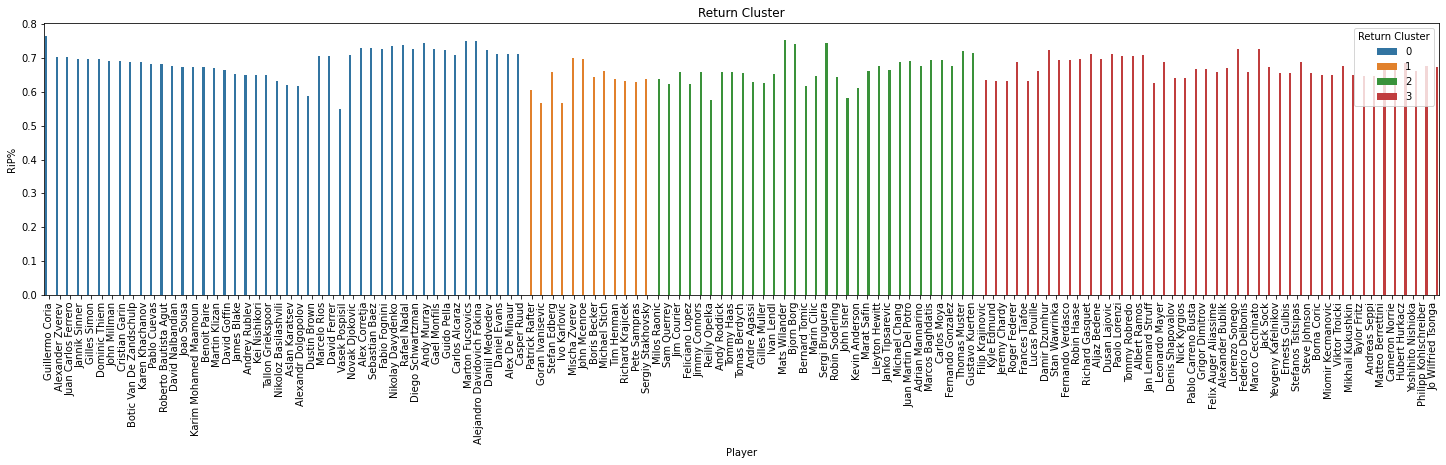

In [163]:
return_plot = return_cluster_agglom.merge(return_df_original)

plt.figure(figsize=(25, 5))
plt.xticks(rotation=90)
plt.title("Return Cluster")
sns.barplot(data=return_plot.sort_values(by="Return Cluster"), x = "Player", y = "RiP%", hue = "Return Cluster")

<AxesSubplot:title={'center':'Return Cluster'}, xlabel='Player', ylabel='RiP%'>

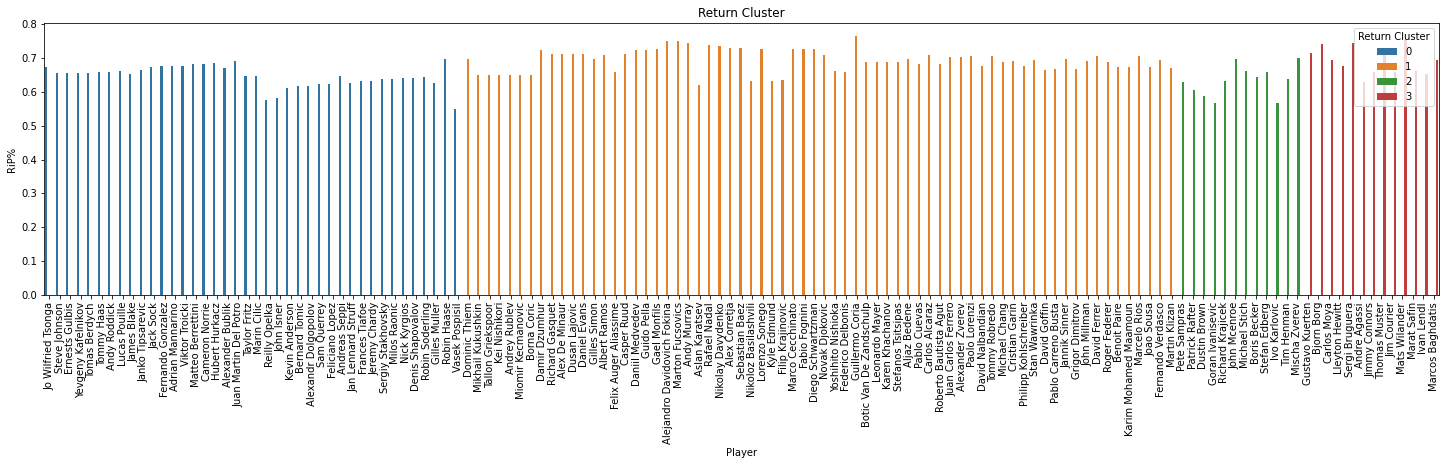

In [164]:
return_plot = return_cluster_kmeans.merge(return_df_original)

plt.figure(figsize=(25, 5))
plt.xticks(rotation=90)
plt.title("Return Cluster")
sns.barplot(data=return_plot.sort_values(by="Return Cluster"), x = "Player", y = "RiP%", hue = "Return Cluster")

In [165]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [174]:
model_return_dendrogram = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='ward')

df_return_scaled = pd.DataFrame(scale(return_df.drop(['Player'],axis=1)), index=return_df.Player, columns=return_df.drop(['Player'],axis=1).columns)

model_return_dendrogram = model_return_dendrogram.fit(df_return_scaled)
model_return_dendrogram.labels_

array([115,  69,  83, 100,  85, 132,  67,  80, 107, 125,  79,  81, 111,
       108, 127, 131,  39,  66,  95,  89, 119,  94, 103,  65, 128,  68,
       120,  77, 112, 110, 106, 118, 109, 121,  91, 123, 105, 129,  53,
        54, 130, 116, 104,  93, 117, 124,  88,  72, 126, 101,  58,  86,
       122,  60,  74,  78,  92,  73, 114,  59,  71,  70,  57,  99,  63,
        75, 113,  76,  98,  32,  87,  43,  64,  37,  52,  31,  61,  49,
        62,  36,  55,  82,  33,  45,  34,  38,  84,  56,  46,  90,  16,
        41,  42,  35,  97,  28,  17,  51,  20,  96,  29,  27,  44,  40,
        18,  47, 102,   8,  48,  15,   7,  19,  25,   3,  21,  50,  23,
        26,  24,   9,  22,  12,  13,  11,  30,  14,   6,   5,  10,   4,
         1,   2,   0])

In [326]:
return_cluster_agglom["Player"]

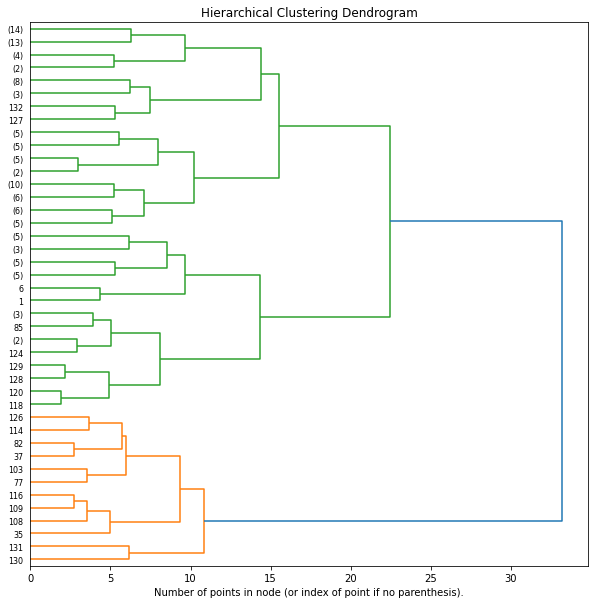

In [329]:
plt.figure(figsize=(10,10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram, where p is the number of levels to truncate at
# how do we use plot_dendrogram?
plot_dendrogram(model_return_dendrogram, truncate_mode = 'level', p=5, labels = return_cluster_agglom.index, orientation = "right")

plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

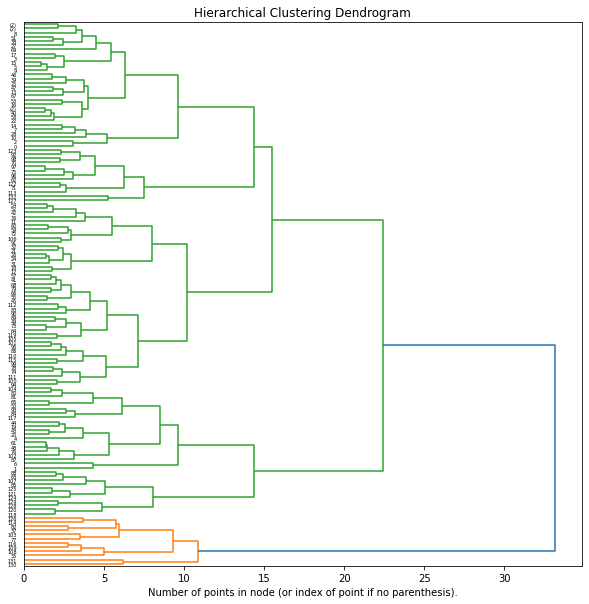

In [323]:
plt.figure(figsize=(10,10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram, where p is the number of levels to truncate at
# how do we use plot_dendrogram?
plot_dendrogram(model_return_dendrogram, truncate_mode = 'level', p=10, labels = serve_cluster_agglom.index, orientation = "right")

plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

# Feature Importance

In [157]:
from kmeans_interp.kmeans_feature_imp import KMeansInterp

<AxesSubplot:xlabel='0'>

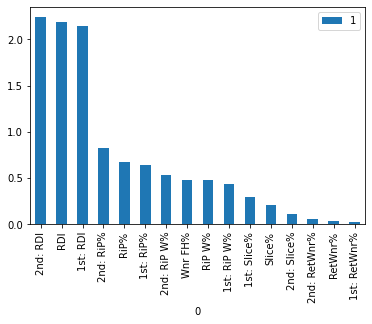

In [158]:
X = return_df.drop('Player',axis=1)
kms = KMeansInterp(n_clusters=4,ordered_feature_names=X.columns.tolist(), feature_importance_method='wcss_min').fit(X.values)      # or 'unsup2sup'
feat_imp2 = pd.DataFrame(kms.feature_importances_[0][:24])
feat_imp2.index=feat_imp2[0]
feat_imp2.drop(0,axis=1,inplace=True)
feat_imp2.plot.bar()

<AxesSubplot:xlabel='0'>

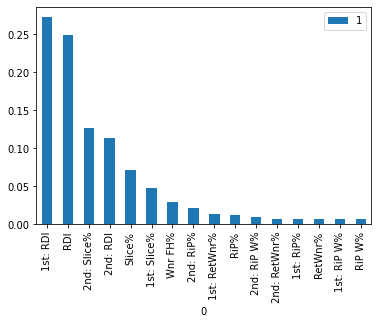

In [159]:
kms = KMeansInterp(n_clusters=4,ordered_feature_names=X.columns.tolist(), feature_importance_method='unsup2sup').fit(X.values)
feat_imp = pd.DataFrame(kms.feature_importances_[0][:24])
feat_imp.index=feat_imp[0]
feat_imp.drop(0,axis=1,inplace=True)
feat_imp.plot.bar()
# kms.feature_importances_[0][:24]

In [160]:
# X = return_df
# kmeans = KMeans(n_clusters=2, random_state=0).fit(X.drop('Player',axis=1))

# for feature in range(X.shape[1]):
#     mean1 = X[kmeans.labels_==0][:,feature].mean()
#     mean2 = X[kmeans.labels_==1][:,feature].mean()
    
#     var1 = X[kmeans.labels_==0][:,feature].var()
#     var2 = X[kmeans.labels_==1][:,feature].var()
    
#     print('feature:',feature,'Mean difference:',round(abs(mean1-mean2),3),'Total Variance:',round((var1+var2),3))

### Looking at Variance in Columns to determine differentiating feature:

In [ ]:
return_df_mag = return_df*100
var_list =[]
for col in return_df_mag.drop('Player',axis=1).columns:
    var_list.append(return_df[col].var())
    print(return_df[col].var())

In [ ]:
variance.index

In [ ]:
variance = pd.DataFrame(var_list,index=return_df_mag.drop('Player',axis=1).columns,columns=['var'])
# variance.index.name='feature'
variance
variance.sort_values(by='var',ascending=False)['var'].plot.bar()

## Other Cluster Methods

In [ ]:
X

In [ ]:
#DBScan 
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.1,metric='euclidean',
    metric_params=None,
    algorithm='auto',
    leaf_size=30,
    p=None,
    n_jobs=None,
    min_samples=3).fit(X)

clustering.labels_

In [ ]:
from sklearn.cluster import MeanShift
# clustering = MeanShift(bandwidth=2).fit(X)
clustering=MeanShift(bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None, max_iter=300).fit(X)
clustering.labels_

### K-distance plot

In [ ]:
import math
def calculate_kn_distance(X,k):

    kn_distance = []
    for i in range(len(X)):
        eucl_dist = []
        for j in range(len(X)):
            eucl_dist.append(
                math.sqrt(
                    ((X.iloc[i,0] - X.iloc[j,0]) ** 2) +
                    ((X.iloc[i,1] - X.iloc[j,1]) ** 2)))

        eucl_dist.sort()
        kn_distance.append(eucl_dist[k])

    return kn_distance


In [ ]:
db_df = return_df[['RiP%','RetWnr%']]
eps_dist=calculate_kn_distance(db_df,3)

In [ ]:
plt.hist(eps_dist,bins=30)
plt.ylabel('n');
plt.xlabel('Epsilon distance');

## Exploring Return Locations (EDA)

In [ ]:
# data_133[(data_133["Player 1 name"]=="Rafael Nadal") & (data_133["Shot_Type_"]=="return") & (data_133['Prev shot From which court'] ==1)]['To which court_'].value_counts(normalize=True)*100
data_133[(data_133["Player 1 name"]=="Roger Federer") & (data_133["Shot_Type_"]=="return") & (data_133['Prev shot From which court'] ==1)]['To which court_'].value_counts()

In [ ]:
data_133[(data_133["Player 1 name"]=="Denis Shapovalov") & (data_133["Shot_Type_"]=="return") & (data_133['Prev shot From which court'] ==3)]['To which court_'].value_counts()

In [ ]:
# data_133[(data_133["Player 1 name"]=="Rafael Nadal") & (data_133["Shot_Type_"]=="return") & (data_133['Prev shot From which court'] ==3) & (data_133['To which court_']=='ad court')]
# data_133[(data_133["Player 1 name"]=="Rafael Nadal") & (data_133["Shot_Type_"]=="return") & (data_133['Prev shot From which court'] ==3) ]
# data_133[(data_133["Shot_Type_"]=="return") & (data_133['Prev shot From which court'] ==3) & (data_133["Player 1 handness"]=='LH') ]['To which court_'].value_counts()
data_133[(data_133["Shot_Type_"]=="return") & (data_133['Prev shot From which court'] ==3) & (data_133["Player 1 handness"]=='RH' ) & (data_133["Player 1 name"]=="Roger Federer")  ]['To which court_'].value_counts()

In [ ]:
# data_133[(data_133["Shot_Type_"]=="return") & (data_133['Prev shot From which court'] ==3) & (data_133["Player 1 handness"]=='RH' ) & (data_133["Player 1 name"]=="Roger Federer") ]["shot_group"].value_counts()
# data_133[(data_133["Shot_Type_"]=="return") & (data_133['Prev shot From which court'] ==1) & (data_133["Player 1 handness"]=='RH' ) & (data_133["Player 1 name"]=="Roger Federer") ]["shot_group"].value_counts()
data_133[(data_133["Shot_Type_"]=="return") & (data_133['Prev shot From which court'] ==1) & (data_133["Player 1 handness"]=='RH' ) & (data_133["Player 1 name"]=="Roger Federer") ].groupby(["shot_group","To which court_"]).count()


In [ ]:
#try clustering based on these:
data_133[(data_133["Shot_Type_"]=="rally") & (data_133['Prev shot From which court'] ==1) & (data_133["Player 1 handness"]=='RH' ) & (data_133["Player 1 name"]=="Novak Djokovic") ].groupby(["shot_group","To which court_"]).count()


In [ ]:
data_133[(data_133["Shot_Type_"]=="rally") & (data_133['Prev shot From which court'] ==1) & (data_133["Player 1 handness"]=='LH' ) & (data_133["Player 1 name"]=="Rafael Nadal") ].groupby(["shot_group","To which court_"]).count()


## Filtering data for top 20 players by Match Count

In [ ]:
pd.options.display.max_rows=100

In [ ]:
serve_data_133.groupby(["Player 1 name"]).size().sort_values(ascending=False)[:50].plot(kind="bar")
serve_data_133.groupby(["Player 1 name"]).size().sort_values(ascending=False)[:20].plot(kind="bar")
# serve_data_133.groupby(["Player 1 name"]).size().sort_values(ascending=False)[:50]

In [ ]:
pd.pivot_table(serve_data_133, values=['Date'], index=['Player 1 name'],aggfunc={'Date': pd.Series.nunique}).sort_values(by='Date',ascending=False)[:30]

In [ ]:
pd.pivot_table(serve_data_133, values=['Date'], index=['Player 1 name'],aggfunc={'Date': pd.Series.nunique}).sort_values(by='Date',ascending=False)[:30].plot(kind="bar")

In [ ]:
#average shots per match
df=pd.pivot_table(serve_data_133, values=['Date'], index=['Player 1 name'],aggfunc=lambda x:len(x)/len(x.unique())).sort_values(by='Date',ascending=False)
df[df.index.isin(["Roger Federer","Novak Djokovic","Rafael Nadal"])]

## Exploring Serve Locations

In [ ]:
# Let's take a look at only Federer, Nadal and Djokovic

In [ ]:
print('Deuce Court')
for player in ["Roger Federer","Rafael Nadal","Novak Djokovic"]:
    print(player)
    print(serve_data_133[(serve_data_133["Player 1 name"]==player) & (serve_data_133["From_Court"]=="deuce court")]["To which court_"].value_counts(normalize=True))

print('Ad Court')
for player in ["Roger Federer","Rafael Nadal","Novak Djokovic"]:
    print(player)
    print(serve_data_133[(serve_data_133["Player 1 name"]==player) & (serve_data_133["From_Court"]=="ad court")]["To which court_"].value_counts(normalize=True))    

In [ ]:
serve_data_133.head()